Disini saya memposisikan sebagai Data Analyst di Amazon Web Services (AWS), yang ditugaskan untuk membuat analisis komprehensif yang ditujukan Product Marketing Team dalam memahami pola retensi dan profitabilitas pelanggan dari data penjualan produk SaaS.

## COMPANY BACKGROUND & BUSINESS CONTEXT
Amazon Web Services (AWS) adalah divisi layanan cloud computing dari Amazon.com, Inc. yang menyediakan solusi Software as a Service (SaaS), Platform as a Service (PaaS), dan Infrastructure as a Service (IaaS) bagi individu, bisnis, dan lembaga di seluruh dunia.

Sejak diluncurkan pada tahun 2006, AWS menjadi pelopor industri cloud computing dengan lebih dari 200 layanan berbasis langganan (subscription-based) yang membantu pelanggan mengakses aplikasi, data analytics, dan infrastruktur tanpa perlu mengelola server fisik.




## STAKEHOLDER INVOLVED

Pada project kali ini, stakeholedr yang dilibatkan adalah **Product Marketing Team**  & **Board of Director**   

## LATAR BELAKANG

Sebagai pemimpin global di bidang Software as a Service (SaaS), Amazon Web Services (AWS) telah menjadi fondasi utama bagi transformasi digital di berbagai sektor industri. Dari startup teknologi hingga korporasi multinasional, pelanggan di seluruh dunia mengandalkan layanan AWS. Namun beberapa waktu terakhir dikarenakan karena fenomena **winter tech** membuat dinamika pasar SaaS menjadi tidak pasti. Dari semua analisa resiko yang sudah direview, pihak **Board of Director (BOD)**  memiliki concern terhadap fenomena ini memberikan arahan kepada **Product Marketing Team** untuk diminta memberi konsentrasi lebih pada **High-Value Customer** potensial selama empat tahun terakhir. 


## PROBLEM STATEMENT

Sebagai respons terhadap kondisi fenomena *winter tech*, **Board of Directors (BOD)** AWS memberikan arahan kepada **Product Marketing Team** untuk memfokuskan upaya mereka pada **High-Value Customers** selama empat tahun terakhir. Dan tim Product Marketing meminta anda sebagai *data analyst* diperusahaan tersebut untuk:

1. Mengidentifikasi siapa pelanggan dengan nilai tertinggi (**High-Value Customers**) berdasarkan data transaksi historis AWS.
2. Menganalisis karakteristik dan pola perilaku **High-Value Customer** potensial berdasarkan faktor-faktor yang memungkinkan untuk dianalisa
3. Merumuskan strategi retensi dan komunikasi promosi yang paling efektif untuk mempertahankan dan meningkatkan **lifetime value (LTV)** **High Value Customer** tersebut.

Analisis ini diharapkan dapat membantu tim Product Marketing dalam merumuskan strategi berbasis data (data-driven strategy) yang mampu memperkuat profitabilitas AWS di tengah tantangan pasar SaaS global yang semakin kompetitif.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt



Dataset dapat diakses di [sini.](https://drive.google.com/file/d/1B6bzI1cmaVlR8hPwgBD3cecAUIkeCp6H/view?usp=drive_link)

Dataset ini adalah data penjualan Software-as-a-Service (SaaS) dengan 9.994 baris transaksi dan 19 kolom.
Berikut penjelasan masing-masing kolom:

1. Row ID : Nomor urut unik untuk setiap baris transaksi dalam dataset.
2. Order ID : ID unik untuk setiap pesanan yang dibuat pelanggan.3
3. Order Date : Tanggal transaksi pemesanan dilakukan (format tanggal).
4. Date Key : Representasi numerik dari tanggal (YYYYMMDD).
5. Contact Name : Nama kontak dari pihak pelanggan yang melakukan pemesanan.
6. Country : Negara tempat pelanggan berada.
7. City : Kota tempat pelanggan berada.
8. Region : Wilayah geografis besar (misalnya: AMER, EMEA, APJ).
9. Subregion : Wilayah geografis yang lebih spesifik (contoh: NAMER, EU-WEST, UKIR, JAPN).
10. Customer : Nama perusahaan atau organisasi yang menjadi pelanggan.
11. Customer ID : Nomor unik yang merepresentasikan pelanggan.
12. Industry : Industri atau sektor bisnis pelanggan (contoh: Energy, Tech, Healthcare).
13. Segment : Segmen pelanggan berdasarkan skala bisnis (contoh: SMB, Enterprise, Strategic).
14. Product : Produk SaaS yang dijual (contoh: FinanceHub, ContactMatcher, Alchemy).
15. License : Kode lisensi unik untuk produk yang dibeli pelanggan.
16. Sales : Nilai penjualan dari transaksi (dalam mata uang tertentu, numerik).
17. Quantity : Jumlah unit produk atau lisensi yang dibeli pelanggan dalam transaksi.
18. Discount : Persentase diskon yang diberikan pada transaksi (dalam bentuk nilai desimal, misalnya 0.20 = 20%).
19. Profit : Keuntungan bersih dari transaksi setelah dikurangi biaya dan diskon.

In [2]:
df = pd.read_csv(r'C:\Users\calic\Downloads\Capstone Module 3\SaaS-Sales.csv')

display(df.head(10),df.tail(10))

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
5,6,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694
6,7,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.2800,4,0.00,1.9656
7,8,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
8,9,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.5040,3,0.20,5.7825
9,10,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,OneView,71J8P9Z1P0,114.9000,5,0.00,34.4700


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9984,9985,EMEA-2021-100251,5/17/2021,20210517,Charles Lee,United Kingdom,Leeds,EMEA,UKIR,UnitedHealth Group,1092,Healthcare,SMB,FinanceHub,HR60J3H8TZ,31.500,10,0.0,15.1200
9985,9986,EMEA-2021-100251,5/17/2021,20210517,Charles Lee,United Kingdom,Leeds,EMEA,UKIR,UnitedHealth Group,1092,Healthcare,SMB,Support,GM2B5HKSRM,55.600,4,0.0,16.1240
9986,9987,AMER-2022-125794,9/30/2022,20220930,Lucas Oliver,United States,New York City,AMER,NAMER,Panasonic,1091,Tech,SMB,Data Smasher,PO8DG1HX3V,36.240,1,0.0,15.2208
9987,9988,EMEA-2023-163629,11/18/2023,20231118,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,1043,Manufacturing,Strategic,Data Smasher,GGI2WZG0KP,79.990,1,0.0,28.7964
9988,9989,EMEA-2023-163629,11/18/2023,20231118,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,1043,Manufacturing,Strategic,Site Analytics,TFALA50KPS,206.100,5,0.0,55.6470
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


## DATA UNDERSTANDING

Sebelum masuk ke tahap analisis yang lebih dalam, kita perlu memahami terlebih dahulu karakteristik dataset yang digunakan dalam konteks kali ini.  
Tahapan **data understanding** bertujuan untuk memberikan gambaran umum mengenai struktur data, konteks bisnis yang diwakili, serta potensi anomali yang mungkin terdapat di dalamnya. 

Pertama kita lihat informasi terkait kolom dan baris didataset ini

In [3]:
print(f'Jumlah Baris dan Kolom yang ada pada Dataset ini adalah:')
df.info()

Jumlah Baris dan Kolom yang ada pada Dataset ini adalah:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      

Jumlah baris (entries): 9.994
Artinya dataset memiliki 9.994 transaksi penjualan SaaS.

Jumlah kolom (features): 19
Setiap kolom merepresentasikan atribut penting seperti tanggal transaksi (Order date), pelanggan (Customer), industri (Industry), produk (Product), penjualan (Sales), diskon (Discount), dan profit (Profit).



Berikut keterangan beberapa kolom penting:
1. Transaksi: Row ID, Order ID, Order Date, Date Key
2. Kinerja keuangan: Sales, Profit, Discount, Quantity  
3. Konteks bisnis: Industry, Segment,
4. Wilayah: Region, Subregion, Country
5. Product: Produt, License
6. Customer Info: Contact Name, Customer, Business Context


Tipe data:

int64 dan float64 → untuk data numerik (contoh: Sales, Profit, Quantity).

object → untuk data kategorikal (contoh: Industry, Segment, Product, Country).

**Pre-Descriptive Statistic & Data Dictionary**

(Current data Dict)

In [4]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,3NTBV9B3PS
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [5]:
# Menampilkan informasi jumlah dan contoh nilai unik di setiap kolom
pd.set_option('display.max_colwidth', None)

listItem = []

for col in df.columns:
    # Ambil hanya 5 sample unik pertama untuk menghindari tampilan panjang
    unique_samples = df[col].unique()[:5]
    
    listItem.append([
        col,
        df[col].nunique(),
        unique_samples
    ])

# Membuat DataFrame ringkasan
table1Desc = pd.DataFrame(
    listItem,
    columns=['Column Name', 'Number of Unique Values', 'Unique Samples (first 5)']
)

# Menampilkan hasil
table1Desc

,Column Name,Number of Unique Values,Unique Samples (first 5)
0,Row ID,9994,"[1, 2, 3, 4, 5]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416]"
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter]"
5,Country,48,"[Ireland, United States, Germany, Sweden, Canada]"
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, Toronto]"
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN]"
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP Paribas, Engie]"


**Cek Missing Value**

In [6]:
df.isnull().any()

Row ID          False
Order ID        False
Order Date      False
Date Key        False
Contact Name    False
Country         False
City            False
Region          False
Subregion       False
Customer        False
Customer ID     False
Industry        False
Segment         False
Product         False
License         False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [7]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Semua kolom menunjukkan False (tidak ada data kosong),
menandakan dataset ini bersih dari missing values pada tahap awal.

In [8]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

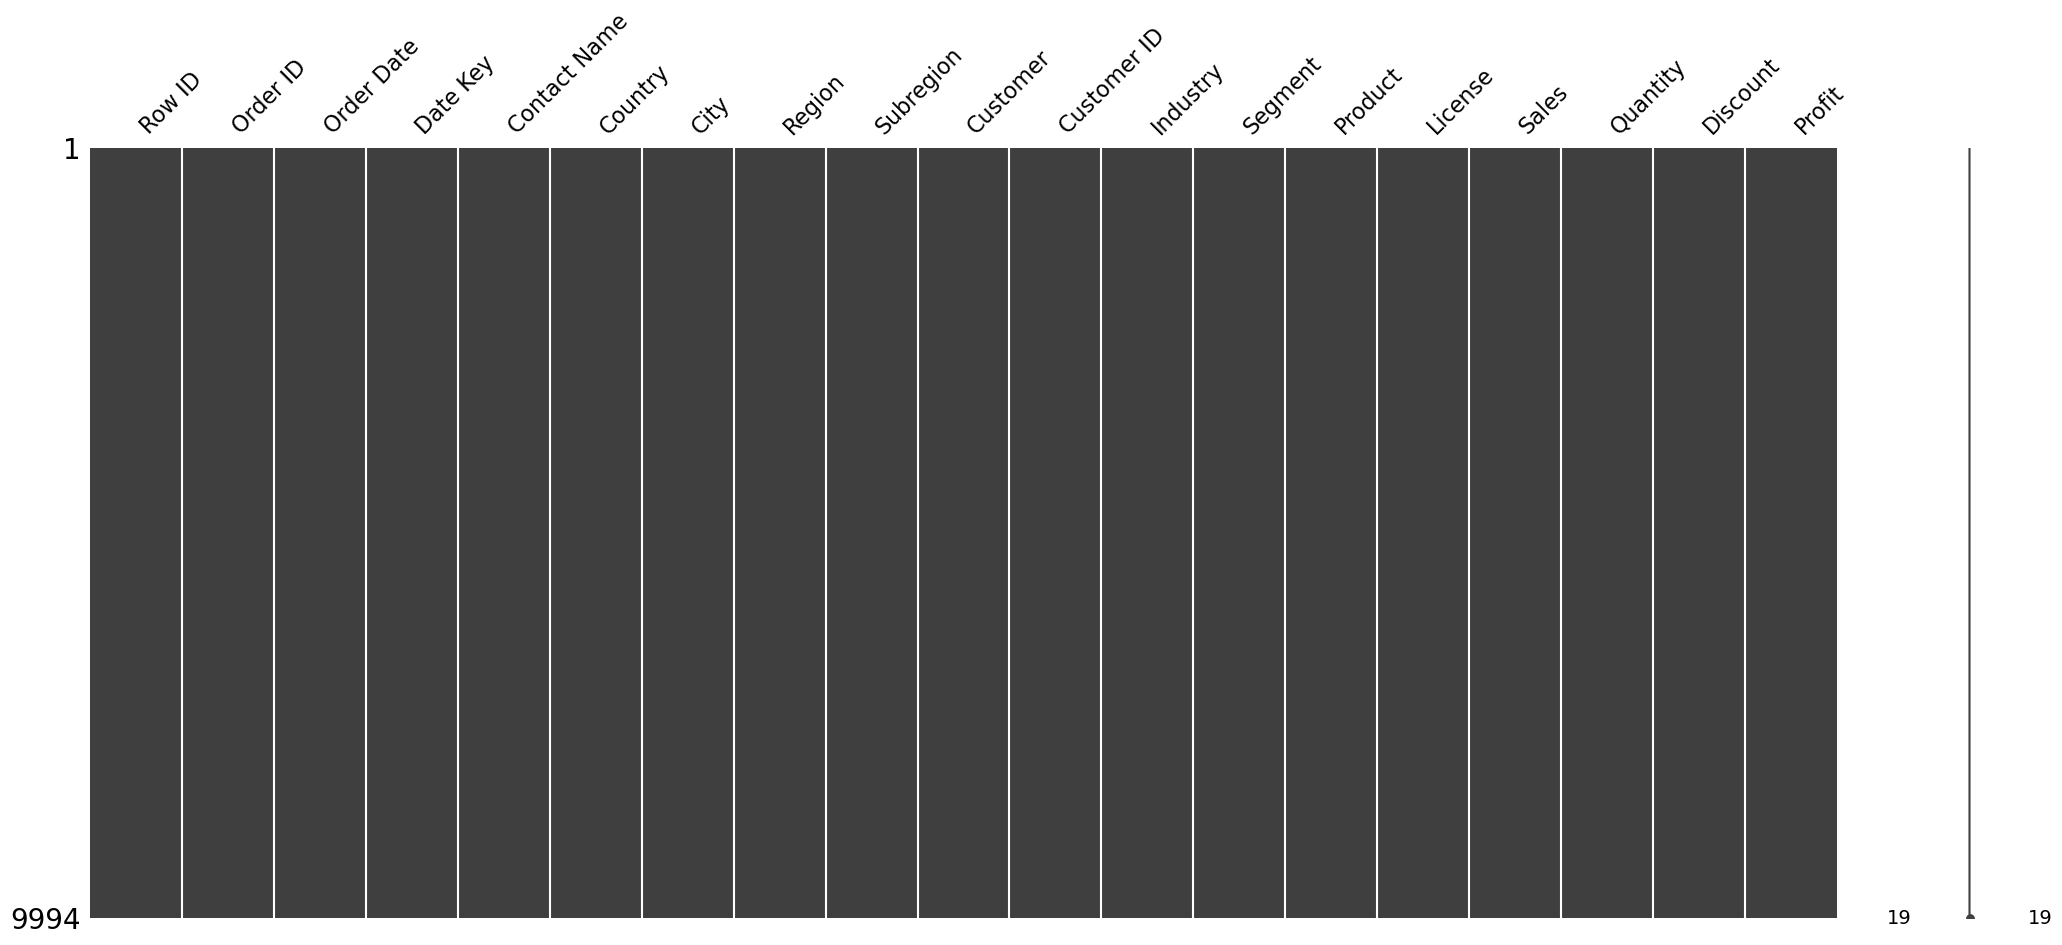

In [9]:
import missingno

missingno.matrix(df)

Semua kolom menunjukkan False (tidak ada data kosong),
menandakan dataset ini bersih dari missing values pada tahap awal.

Tahapan ini menunjukkan bahwa dataset SaaS Sales sudah memiliki struktur yang rapi dan siap untuk dilanjutkan ke proses data cleaning lanjutan (misalnya konversi tanggal, pembuatan kolom  dan analisis outlier).

## DATA CLEANING AND DATA PREPARATION



**Data Cleaning**

Sebelum masuk ke tahap preparasi data, perlu dilakukan penghapusan kolom-kolom yang tidak diperlukan dalam proses analysis



In [10]:
df.drop(columns=['Row ID', 'License'], inplace=True, errors='ignore')

- Kolom *Row ID* diputuskan untuk dihapus karena tidak diperlukan dalam analisis.
- Kolom *License* diputuskan untuk dihapus karena tidak diperlukan dalam analisis.    

C:\Users\calic\AppData\Local\Temp\ipykernel_23592\1572554484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segment', y='Sales', palette='Set2')


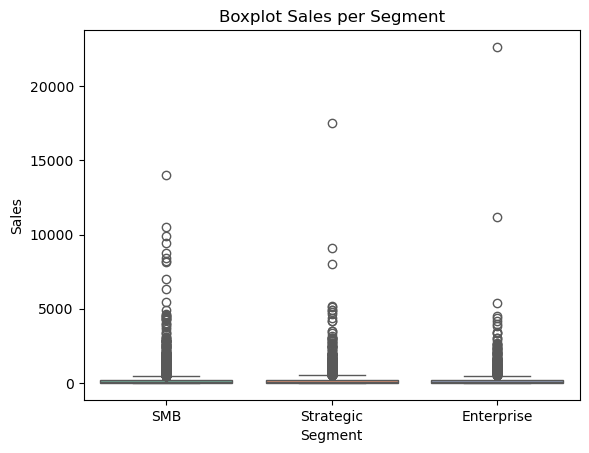

In [11]:
#Boxplot Segment
sns.boxplot(data=df, x='Segment', y='Sales', palette='Set2')
plt.title('Boxplot Sales per Segment')
plt.show()

Kolom *Segment* dalam konteks analisis kali ini tidak akan dihapus, namun **diabaikan** dalam proses *Exploratory Data Analysis (EDA)*, karena jika dilihat pola distribusi sales per kelas segmen di atas, tidak terdapat perbedaan signifikan antara ketiga kategori. Sebaran nilai transaksi di masing-masing segmen terlihat relatif serupa, dengan beberapa nilai ekstrem yang muncul di ketiganya. Yang artinya definisi **High-Value Customer** tidak dipertimbangkan berdasarkan pelanggan berada disegment apa. Kolom segment akan digunakan hanya dibagian *Identifikasi Outlier*.

Hal ini menunjukkan bahwa variabel Segment tidak memberikan pembeda yang kuat terhadap performa pelanggan.

**Data Formatting**

Format kolom Order Date masih berupa object, perlu diubah menjadi format date time untuk dapat memungkinkan bisa menganalisa berdasarkan time series.

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Date Key      9994 non-null   int64         
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   int64         
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

Kolom order date sudah diganti formatnya menjadi datetime.

**Duplicate Checking**

In [13]:
df.duplicated(subset=['Order ID']).sum()


np.int64(4985)

In [14]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 1


Ada 4.985 baris dengan Order ID yang sama, tapi kolom lain berbeda (misal: produk berbeda dalam satu pesanan). Namun ini bukan duplikasi error, tapi struktur normal dari data transaksi. Karena satu pelanggan bisa membeli beberapa produk dalam satu pesanan (Order ID yang sama). Ketika dicek unique per baris, tidak ditemukan duplikasi pada data. Jadi tidak diperlukan tindakan penghapusan duplikat data.

**Adding New Collumn (Penambahan Kolom Baru)**

Untuk mendukung kebutuhan analisis lanjutan, dibuat kolom turunan baru pada dataset, yaitu Year. Tujuannya untuk menunjukkan tahun terjadinya transaksi, yang digunakan untuk menganalisis tren penjualan dan profit antar tahun, serta mendukung identifikasi pola retensi pelanggan dalam jangka waktu tertentu.

In [15]:
df['Year'] = df['Order Date'].dt.year

# Menampilkan 5 baris pertama untuk verifikasi
df[['Sales', 'Profit',  'Discount', 'Year']].head()         

,Sales,Profit,Discount,Year
0,261.9600,41.9136,0.00,2022
1,731.9400,219.5820,0.00,2022
2,14.6200,6.8714,0.00,2022
3,957.5775,-383.0310,0.45,2021
4,22.3680,2.5164,0.20,2021


**Identifikasi Outlier**

Dalam fase ini akan dilakukan proses identifikasi Outliers dibeberapa kolom numerikal. Tujuannya untuk tahu apakah outlier bersifat gangguan (noise) didalam data, atau tetap harus dipertahankan

Pertama kita cek bagian apa saja yang perlu dicek outliernya

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Date Key      9994 non-null   int64         
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   int64         
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

Untuk pengecekan outliers kita fokus pada kolom numerikal, yaitu **Sales, Quantity, Discount, Profit** 

In [17]:
cols = ['Sales', 'Quantity', 'Discount', 'Profit']

# Statistik deskriptif dasar
desc = df[cols].describe().T
desc['IQR'] = desc['75%'] - desc['25%']
desc['Lower_Bound'] = desc['25%'] - 1.5 * desc['IQR']
desc['Upper_Bound'] = desc['75%'] + 1.5 * desc['IQR']

# Hitung jumlah outlier per kolom
outlier_counts = {}
for col in cols:
    lower = desc.loc[col, 'Lower_Bound']
    upper = desc.loc[col, 'Upper_Bound']
    outlier_counts[col] = ((df[col] < lower) | (df[col] > upper)).sum()

desc['Outlier_Count'] = pd.Series(outlier_counts)

# Tampilkan hasil
desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR', 'Lower_Bound', 'Upper_Bound', 'Outlier_Count']]

,mean,std,min,25%,50%,75%,max,IQR,Lower_Bound,Upper_Bound,Outlier_Count
Sales,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480,192.66000,-271.710000,498.930000,1167
Quantity,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000,3.00000,-2.500000,9.500000,170
Discount,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800,0.20000,-0.300000,0.500000,856
Profit,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976,27.63525,-39.724125,70.816875,1881


In [18]:


# Tentukan kolom yang akan dicek
cols = ['Sales', 'Quantity', 'Discount', 'Profit']

# Buat DataFrame kosong untuk hasil
outlier_summary = pd.DataFrame(columns=['Lower Bound', 'Upper Bound', 'Number of Outliers'])

# Loop untuk setiap kolom
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung jumlah outlier
    num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    # Masukkan hasil ke tabel
    outlier_summary.loc[col] = [round(lower_bound, 2), round(upper_bound, 2), num_outliers]

# Tampilkan hasil akhir
outlier_summary.style.set_caption("Outlier Detection Summary (IQR Method)")\
                    .background_gradient(subset=['Number of Outliers'], cmap='Reds')\
                    .format({'Lower Bound': '{:.2f}', 'Upper Bound': '{:.2f}'})


,Lower Bound,Upper Bound,Number of Outliers
Sales,-271.71,498.93,1167.000000
Quantity,-2.50,9.50,170.000000
Discount,-0.30,0.50,856.000000
Profit,-39.72,70.82,1881.000000


Sales (1167 Outliers): 

Terdapat banyak nilai Sales yang melampaui batas atas. Artinya, terdapat transaksi dengan nilai penjualan jauh lebih besar dibanding mayoritas data lain, menunjukkan adanya variasi besar dalam nilai transaksi.

Quantity (170 Outliers): 

Terdapat sebagian kecil transaksi memiliki jumlah pembelian produk atau lisensi yang jauh lebih tinggi dari umumnya, namun jumlah outlier relatif sedikit dibanding kolom lain.

Discount - (856 Outliers): 

Banyak nilai Discount melebihi 0.5 (50%). Ini menunjukkan adanya transaksi dengan diskon besar yang melampaui rentang normal diskon rata-rata.

Profit - (1881 Outliers): 

Kolom Profit memiliki jumlah outlier terbanyak, menandakan banyak transaksi dengan profit ekstrem — baik jauh di bawah maupun jauh di atas kisaran normal.

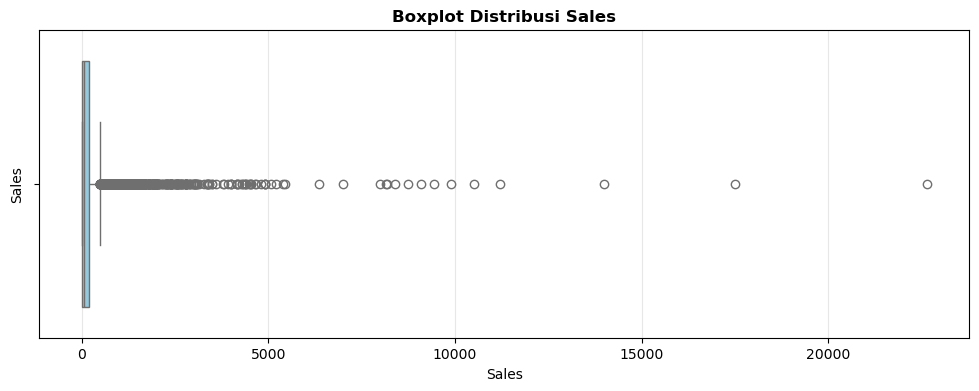

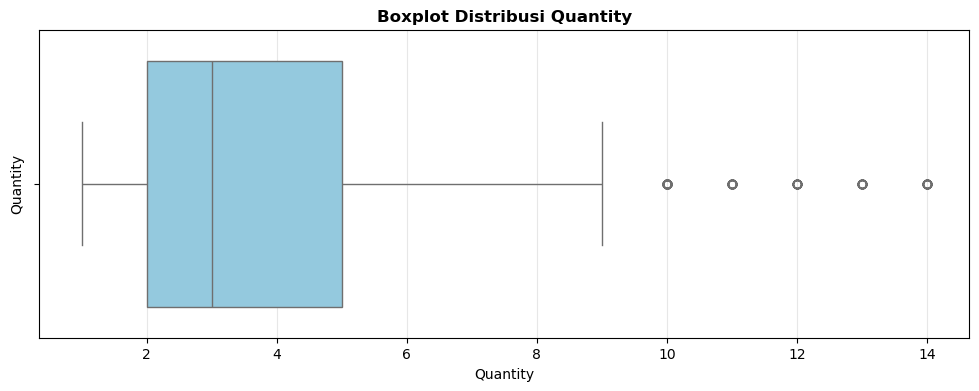

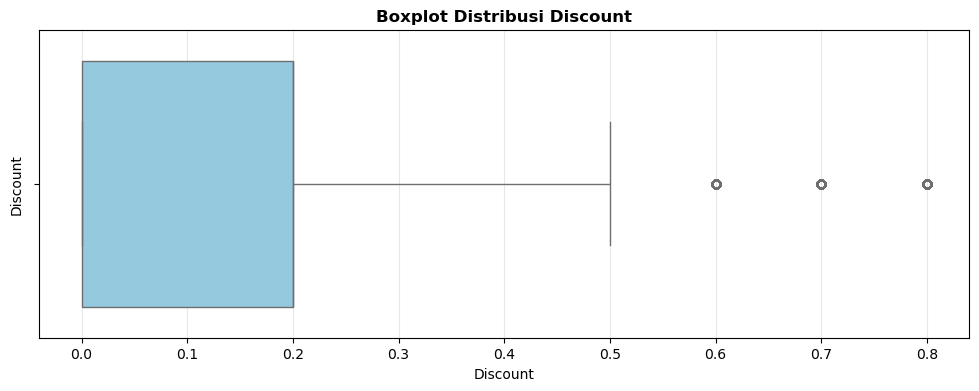

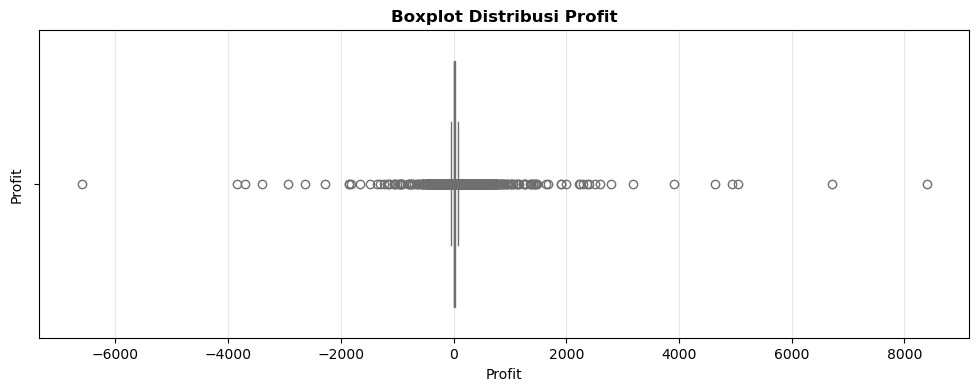

In [19]:
cols = ['Sales', 'Quantity', 'Discount', 'Profit']

# Loop untuk membuat boxplot per kolom
for col in cols:
    plt.figure(figsize=(12,4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot Distribusi {col}', fontsize=12, fontweight='bold')
    plt.ylabel(col)
    plt.grid(True, axis='x', alpha=0.3)
    plt.show()


Sales memiliki sejumlah outlier dengan nilai sangat tinggi. Hal ini menunjukkan adanya transaksi penjualan dengan **nilai ekstrim jauh di atas rata-rata** — menandakan terdapat **variasi besar antara transaksi kecil dan proyek bernilai besar**. **Outlier positif** ini merepresentasikan **pelanggan yang bertransaksi dengan nilai besar yang berkontribusi signifikan** terhadap total pendapatan.

Quantity memiliki jumlah outlier paling sedikit dibanding kolom lainnya, yang artinya, volume pembelian **relatif stabil antar transaksi**, dan perbedaan jumlah lisensi atau produk yang dibeli tidak terlalu ekstrem.

Discount memperlihatkan banyak nilai ekstrem di atas 0.5 (50%). Ini menunjukkan adanya **transaksi dengan potongan harga besar**, yang bisa memengaruhi margin keuntungan di beberapa segmen.

Profit memiliki jumlah outlier terbanyak (1881), menandakan adanya transaksi dengan **kerugian ekstrem**. Namun, hal ini tidak selalu berarti kesalahan data. Dalam konteks AWS SaaS, nilai ekstrem tersebut dapat mencerminkan strategi bisnis nyata, seperti pemberian diskon besar atau proyek berskala besar yang membutuhkan investasi awal.


Validasi cek apakah outlier ini merupakan anomali data

1. Sales

In [20]:
# Cek apakah ada nilai Sales <= 0 (negative value)
df[df['Sales'] <= 0]


,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Year


Tidak ada negative value pada kolom Sales

Selanjutnya kita akan melakukan validasi pada angka ekstrim

In [21]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Filter transaksi dengan nilai Sales di atas batas atas (outlier positif)
sales_outlier = df[df['Sales'] > upper_bound]

# Cek jumlah dan proporsi outlier terhadap total transaksi
num_outliers = len(sales_outlier)
total_rows = len(df)
prop_outlier = num_outliers / total_rows * 100

num_outliers, round(prop_outlier, 2)

(1167, 11.68)

Terdapat **1167 Outliers** dengan persentase **11.68%** dari keseluruhan data

In [22]:
sales_outlier[['Order ID', 'Customer', 'Segment', 'Sales', 'Profit', 'Discount', 'Year']] \
    .sort_values('Sales', ascending=False) \
    .head(10)

,Order ID,Customer,Segment,Sales,Profit,Discount,Year
2697,EMEA-2020-145317,Anthem,Enterprise,22638.480,-1811.0784,0.5,2020
6826,APJ-2022-118689,Coca-Cola,Strategic,17499.950,8399.9760,0.0,2022
8153,AMER-2023-140151,Mondelez International,SMB,13999.960,6719.9808,0.0,2023
2623,EMEA-2023-127180,Trafigura Group,Enterprise,11199.968,3919.9888,0.2,2023
4190,APJ-2023-166709,Lowes,SMB,10499.970,5039.9856,0.0,2023
9039,AMER-2022-117121,Valero Energy,SMB,9892.740,4946.3700,0.0,2022
4098,EMEA-2020-116904,Anthem,SMB,9449.950,4630.4755,0.0,2020
4277,AMER-2022-107440,Lowes,Strategic,9099.930,2365.9818,0.0,2022
8488,EMEA-2022-158841,Honda Motor,SMB,8749.950,2799.9840,0.0,2022
6425,EMEA-2022-143714,BMW,SMB,8399.976,1119.9968,0.4,2022


Hasil pemeriksaan terhadap 10 transaksi dengan nilai Sales tertinggi menunjukkan bahwa seluruhnya merupakan transaksi bernilai besar yang berada di atas batas atas (upper bound) dari distribusi normal penjualan.

Beberapa pola penting terlihat dari data tersebut:

Nilai Sales sangat tinggi — berkisar antara 8.399 hingga 22.638 (jauh di atas rata-rata penjualan umum).
Ini menegaskan bahwa outlier yang terdeteksi benar-benar merupakan transaksi bernilai ekstrem, bukan error input data.

Segmen pelanggan bervariasi, tetapi mayoritas berasal dari Enterprise, Strategic, dan beberapa SMB besar (mis. Mondelez, Valero Energy, Honda Motor).
Hal ini menunjukkan bahwa pelanggan dari berbagai skala bisnis bisa melakukan transaksi besar, tergantung kebutuhan dan kontrak.

Diskon relatif kecil (0.0–0.5), dan seluruh transaksi mencatat profit positif yang besar pula.
Artinya, transaksi besar ini bukan hasil promosi ekstrem, melainkan penjualan normal bernilai tinggi dengan margin sehat, sehingga memberikan kontribusi signifikan pada total pendapatan AWS SaaS.

Periode transaksi tersebar antara 2020–2023, menandakan bahwa nilai besar seperti ini konsisten terjadi di tiap tahun, bukan kasus tunggal.

In [23]:
# Hitung kontribusi total Sales dari transaksi outlier
total_sales = df['Sales'].sum()
sales_outlier_sum = sales_outlier['Sales'].sum()
contribution_pct = (sales_outlier_sum / total_sales) * 100

round(contribution_pct, 2)

np.float64(64.32)

Meskipun jumlahnya sedikit, kontribusinya terhadap total pendapatan mencapai **64.32%**, sehingga mendukung pernyataan bahwa outlier positif pada Sales merepresentasikan pelanggan bernilai tinggi dengan transaksi besar yang berkontribusi signifikan pada revenue AWS SaaS.

Kesimpulannya outlier pada kolom Sales merepresentasikan transaksi bernilai sangat tinggi yang benar-benar terjadi dan memberikan kontribusi besar terhadap pendapatan AWS SaaS.
Nilai ekstrem ini tidak menunjukkan anomali, melainkan pelanggan besar (Enterprise dan Strategic) dengan kontrak bernilai tinggi dan profit yang substansial.

2. Quantity

In [24]:
# Hitung parameter IQR
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Jumlah dan proporsi outlier
num_outliers = ((df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)).sum()
prop_outlier = (num_outliers / len(df)) * 100

# Buat output dalam bentuk DataFrame
quantity_summary = pd.DataFrame({
    'Q1': [round(Q1, 2)],
    'Q3': [round(Q3, 2)],
    'IQR': [round(IQR, 2)],
    'Lower Bound': [round(lower_bound, 2)],
    'Upper Bound': [round(upper_bound, 2)],
    'Number of Outliers': [num_outliers],
    'Outlier %': [round(prop_outlier, 2)]
})

quantity_summary.style.set_caption("Outlier Summary for Quantity")


,Q1,Q3,IQR,Lower Bound,Upper Bound,Number of Outliers,Outlier %
0,2.000000,5.000000,3.000000,-2.500000,9.500000,170,1.700000


Hasil perhitungan menunjukkan bahwa kolom Quantity memiliki Lower Bound -2.5 dan Upper Bound 9.5, dengan total 170 outlier (sekitar 3.1% dari total data).
Nilai ini relatif kecil dibandingkan kolom lain, menegaskan bahwa volume pembelian antar transaksi cenderung stabil dan tidak banyak variasi ekstrem.

In [25]:
df['Quantity'].sort_values(ascending=False).head(10)

6488    14
8521    14
1429    14
1433    14
8074    14
113     14
9515    14
1711    14
6499    14
7387    14
Name: Quantity, dtype: int64

Nilai tertinggi masih <15, maka variasi volume pembelian dapat dikatakan stabil.

Hasil validasi menunjukkan bahwa nilai Quantity memiliki rentang interkuartil sempit dan jumlah outlier sangat sedikit (sekitar <2% dari total 9994 data).
Nilai tertinggi yang ditemukan masih dalam batas realistis (tidak diatas 100), menandakan tidak ada transaksi dengan volume pembelian ekstrem.4

Dengan jumlah outlier paling sedikit dan variasi kecil antar transaksi, kolom Quantity benar-benar menunjukkan stabilitas volume pembelian.
Hal ini menegaskan bahwa perbedaan nilai penjualan antar pelanggan lebih dipengaruhi oleh harga kontrak dan diskon, bukan oleh jumlah unit yang dibeli.

3. Discount

Pertama kita cek ada berapa transaksi dengan diskon yang besar

In [26]:
# Hitung berapa banyak transaksi dengan diskon > 0.5
high_discount_count = (df['Discount'] > 0.5).sum()
total_rows = len(df)
prop_high_discount = (high_discount_count / total_rows) * 100

# Nilai minimum, maksimum, dan rata-rata
min_d = df['Discount'].min()
max_d = df['Discount'].max()
mean_d = df['Discount'].mean()

pd.DataFrame({
    'Total Data': [total_rows],
    'Discount > 0.5 (count)': [high_discount_count],
    'Percentage (%)': [round(prop_high_discount, 2)],
    'Min Discount': [round(min_d, 2)],
    'Max Discount': [round(max_d, 2)],
    'Mean Discount': [round(mean_d, 2)]
})


,Total Data,Discount > 0.5 (count),Percentage (%),Min Discount,Max Discount,Mean Discount
0,9994,856,8.57,0.0,0.8,0.16


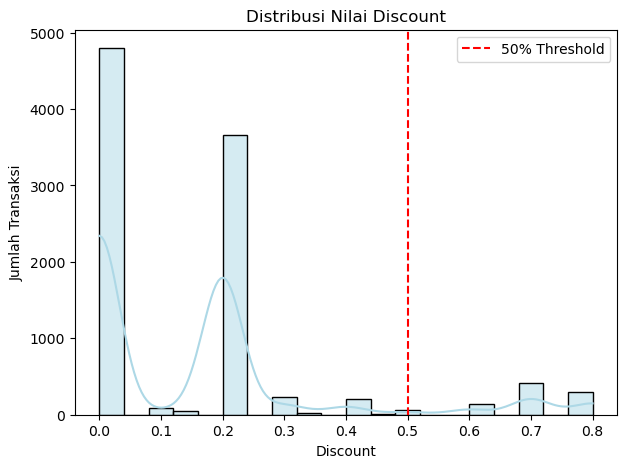

In [27]:
plt.figure(figsize=(7,5))
sns.histplot(df['Discount'], bins=20, kde=True, color='lightblue')
plt.axvline(0.5, color='red', linestyle='--', label='50% Threshold')
plt.title('Distribusi Nilai Discount')
plt.xlabel('Discount')
plt.ylabel('Jumlah Transaksi')
plt.legend()
plt.show()

In [28]:
df[df['Discount'] > 0.5][['Order ID', 'Customer', 'Segment', 'Sales', 'Profit', 'Discount']].head(25)


,Order ID,Customer,Segment,Sales,Profit,Discount
14,APJ-2021-118983,Pfizer,Enterprise,68.810,-123.8580,0.8
15,APJ-2021-118983,Pfizer,Enterprise,2.544,-3.8160,0.8
28,EMEA-2021-150630,Intel,SMB,9.618,-7.0532,0.7
32,EMEA-2021-150630,Intel,SMB,6.858,-5.7150,0.7
36,APJ-2022-117590,Procter & Gamble,Strategic,190.920,-147.9630,0.6
75,APJ-2023-118038,Nissan Motor,Strategic,1.248,-1.9344,0.8
76,APJ-2023-118038,Nissan Motor,Strategic,9.708,-5.8248,0.6
78,APJ-2020-147606,Oracle,SMB,19.300,-14.4750,0.6
95,EMEA-2023-109484,Walgreens,Enterprise,5.682,-3.7880,0.7
101,APJ-2022-158568,Philip Morris International,Enterprise,1.788,-3.0396,0.8


Diskon besar muncul di berbagai pelanggan atau segmen tertentu (SMB, Enterprise, Strategic).

In [29]:
# Seluruh discount counts
target_discounts = [0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8]
df_disc = df[df['Discount'].isin(target_discounts)]

# Hitung jumlah transaksi tiap kombinasi Segment × Discount
discount_counts = (
    df_disc.groupby(['Segment', 'Discount'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Segment', 'Discount'])
)

# Tampilkan tabel hasil
discount_counts


,Segment,Discount,Count
0,Enterprise,0.1,17
1,Enterprise,0.2,609
2,Enterprise,0.3,40
3,Enterprise,0.4,36
4,Enterprise,0.5,12
5,Enterprise,0.6,25
6,Enterprise,0.7,73
7,Enterprise,0.8,46
8,SMB,0.1,50
9,SMB,0.2,1916


In [30]:

import matplotlib.pyplot as plt

# Filter hanya transaksi dengan diskon 0.5, 0.6, 0.7, dan 0.8
target_discounts = [0.5, 0.6, 0.7, 0.8]
df_disc = df[df['Discount'].isin(target_discounts)]

# Hitung jumlah transaksi tiap kombinasi Segment × Discount
discount_counts = (
    df_disc.groupby(['Segment', 'Discount'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Segment', 'Discount'])
)

# Tampilkan tabel hasil
discount_counts


,Segment,Discount,Count
0,Enterprise,0.5,12
1,Enterprise,0.6,25
2,Enterprise,0.7,73
3,Enterprise,0.8,46
4,SMB,0.5,37
5,SMB,0.6,74
6,SMB,0.7,210
7,SMB,0.8,167
8,Strategic,0.5,17
9,Strategic,0.6,39


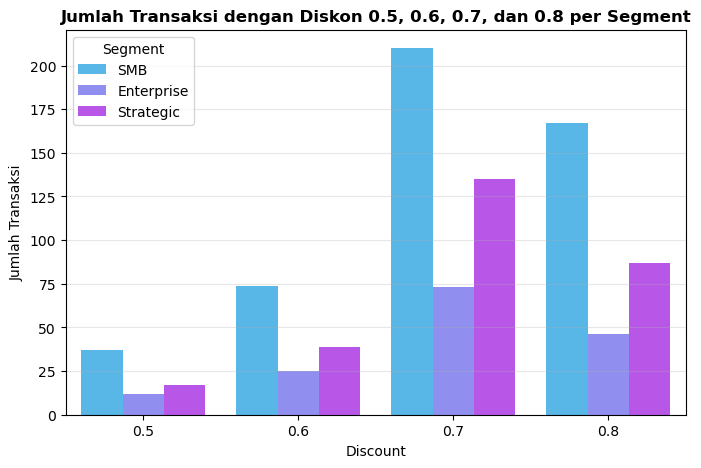

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Discount',
    y='Count',
    hue='Segment',
    data=discount_counts,
    palette='cool',
    hue_order=['SMB', 'Enterprise', 'Strategic'],   # urutan segmen manual
    order=[0.5, 0.6, 0.7, 0.8]                      # urutan diskon tetap naik
)
plt.title('Jumlah Transaksi dengan Diskon 0.5, 0.6, 0.7, dan 0.8 per Segment', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Discount')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Segment')
plt.show()

Hasil validasi menunjukkan bahwa diskon tinggi (≥ 0.5) memang sering diterapkan di seluruh segmen pelanggan, dengan pola paling menonjol pada SMB.

SMB mendominasi jumlah transaksi dengan diskon besar (terutama 0.7 dan 0.8), menandakan strategi harga agresif untuk menarik volume pelanggan lebih banyak.

Strategic juga menerima diskon tinggi, meski dalam jumlah lebih terbatas, kemungkinan untuk menjaga loyalitas pelanggan bernilai tinggi.

Enterprise memiliki jumlah transaksi paling sedikit dengan potongan besar, menunjukkan pendekatan harga yang lebih stabil dan berbasis kontrak jangka panjang.

Secara keseluruhan, temuan ini memvalidasi bahwa outlier diskon di atas 0.5 bukan anomali, melainkan bagian dari strategi penetapan harga AWS SaaS yang berbeda antar segmen, sesuai potensi dan karakteristik masing-masing pelanggan.

4.Profit

Pertama kita analisa bagian lower bound terlebih dahulu

In [32]:
# Ambil batas bawah profit ekstrem
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR

# Filter hanya transaksi dengan profit < lower bound
profit_extreme = df[df['Profit'] < lower_bound]

# Lihat 10 contoh pertama
profit_extreme.head(10)

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Year
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,2021
14,APJ-2021-118983,2021-11-22,20211122,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,1074,Healthcare,Enterprise,OneView,68.8100,5,0.80,-123.8580,2021
27,EMEA-2021-150630,2021-09-17,20210917,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,3083.4300,7,0.50,-1665.0522,2021
36,APJ-2022-117590,2022-12-09,20221209,Chloe Short,Japan,Aichi,APJ,JAPN,Procter & Gamble,1077,Consumer Products,Strategic,SaaS Connector Pack,190.9200,5,0.60,-147.9630,2022
38,APJ-2021-117415,2021-12-27,20211227,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,1101,Finance,Enterprise,Marketing Suite,532.3992,3,0.32,-46.9764,2021
72,EMEA-2021-134026,2021-04-26,20210426,Anne Lee,South Africa,Cape Town,EMEA,MEA,Oracle,1072,Tech,SMB,FinanceHub,831.9360,8,0.20,-114.3912,2021
84,APJ-2023-119662,2023-11-14,20231114,Bernadette Nolan,Australia,Sydney,APJ,ANZ,Royal Dutch Shell,1031,Energy,Enterprise,Marketing Suite - Gold,230.3760,3,0.20,-48.9549,2023
118,EMEA-2021-136476,2021-04-05,20210405,Jennifer Dowd,South Africa,Cape Town,EMEA,MEA,Gazprom,1027,Energy,Strategic,ContactMatcher,157.7940,1,0.70,-115.7156,2021
125,APJ-2020-134614,2020-09-20,20200920,Sally Berry,Australia,Geelong,APJ,ANZ,Tesco,1059,Retail,SMB,ContactMatcher,617.7000,6,0.50,-407.6820,2020
165,APJ-2020-139892,2020-09-08,20200908,Melanie Davidson,Japan,Osaka,APJ,JAPN,Nissan Motor,1098,Transportation,SMB,Big Ol Database,8159.9520,8,0.40,-1359.9920,2020


In [33]:
profit_extreme[['Order ID', 'Customer', 'Segment', 'Discount', 'Sales', 'Profit', 'Year']].sort_values('Profit').head(30)

,Order ID,Customer,Segment,Discount,Sales,Profit,Year
7772,AMER-2022-108196,Allstate,SMB,0.7,4499.985,-6599.9780,2022
683,EMEA-2023-168116,Costco Wholesale,Strategic,0.5,7999.980,-3839.9904,2023
9774,APJ-2020-169019,Bosch,SMB,0.8,2177.584,-3701.8928,2020
3011,EMEA-2023-134845,FedEx,Enterprise,0.7,2549.985,-3399.9800,2023
4991,APJ-2023-122714,Ford Motor,Strategic,0.8,1889.990,-2929.4845,2023
3151,AMER-2021-147830,Walgreens,SMB,0.7,1799.994,-2639.9912,2021
5310,APJ-2023-131254,Itochu,SMB,0.8,1525.188,-2287.7820,2023
9639,EMEA-2021-116638,Morgan Stanley,SMB,0.4,4297.644,-1862.3124,2021
1199,APJ-2022-130946,Volkswagen,SMB,0.8,1088.792,-1850.9464,2022
2697,EMEA-2020-145317,Anthem,Enterprise,0.5,22638.480,-1811.0784,2020


Berdasarkan hasil filter terhadap 30 transaksi dengan nilai profit terendah, diperoleh beberapa pola penting:

-Mayoritas transaksi memiliki diskon sangat tinggi (≥ 0.7 atau 70%)
Ini menjadi indikasi kuat bahwa kerugian ekstrem bukan kesalahan data, melainkan akibat langsung dari strategi promosi atau insentif harga besar.
Dengan diskon sebesar ini, profit negatif bisa dianggap konsekuensi logis dari strategi akuisisi atau retensi pelanggan.

-Profit negatif ekstrem tidak terbatas pada satu segmen saja
Terlihat di data bahwa segmen SMB, Enterprise, dan Strategic semuanya memiliki transaksi rugi besar.
Artinya, kebijakan diskon besar tidak hanya diberikan pada pelanggan besar (Enterprise), tetapi juga diterapkan pada segmen lain untuk memperluas pasar atau mempertahankan kontrak.

-Beberapa pelanggan besar muncul berulang
Misalnya: Allstate, Morgan Stanley, Bosch, FedEx, dan Volkswagen — menunjukkan bahwa kerugian ini mungkin muncul pada pelanggan jangka panjang atau proyek multi-tahun, yang keuntungannya baru terasa di periode berikutnya.

-Tahun transaksi bervariasi (2020–2023)
Artinya, fenomena ini bukan anomali satu periode, tetapi pola bisnis yang konsisten dari waktu ke waktu, menandakan kebijakan harga fleksibel sebagai strategi pasar AWS SaaS.

Nilai profit negatif ekstrem yang teridentifikasi sebagian besar disebabkan oleh diskon tinggi (≥ 50–80%), bukan karena kesalahan input atau outlier palsu.
Transaksi-transaksi ini merepresentasikan strategi harga agresif yang digunakan AWS SaaS untuk mempertahankan pelanggan besar dan memperluas pangsa pasar di berbagai segmen.

**Hasil Validasi**

Secara keseluruhan, hasil validasi menunjukkan bahwa outlier dalam dataset AWS SaaS adalah bagian dari **variasi bisnis yang sah**, **bukan kesalahan data**.
Nilai ekstrem yang muncul justru memberikan informasi penting tentang strategi penetapan harga, perbedaan skala pelanggan, dan dinamika profitabilitas antar segmen.

Singkatnya, outlier di sini **bukan anomali**, melainkan cerminan dinamika profitabilitas dan strategi pasar AWS SaaS. Dengan hasil ini disimpulkan bahwa nilai outlier tidak perlu dihapus, karena justru merepresentasikan **variasi kondisi bisnis yang wajar.**

## EXPLORATORY DATA ANALYISIS

**Analisa Customer Lifetime Value menggunakan Metode LRFM**

Pendekatan LRFM dipilih karena memberikan pandangan menyeluruh terhadap perilaku pelanggan: seberapa lama mereka bertahan (Length), seberapa baru transaksi terakhirnya (Recency), seberapa sering bertransaksi (Frequency), dan seberapa menguntungkan (Monetary).
Dengan menganalisis keempat dimensi ini, perusahaan dapat mengidentifikasi pelanggan bernilai tinggi yang layak menjadi konsentrasi bisnis.

Pertama kita siapkan dataset dengan 5 kolom yang relevan untuk menganalisa LRFM (Kolom Customer, Order Date, Order ID, Profit)

In [34]:
# BASIS DATA LRFM
cols = ['Customer', 'Order ID', 'Order Date', 'Profit']
df_lrfm = df[cols].copy()

df_lrfm.head(10)

,Customer,Order ID,Order Date,Profit
0,Chevron,EMEA-2022-152156,2022-11-09,41.9136
1,Chevron,EMEA-2022-152156,2022-11-09,219.5820
2,Phillips 66,AMER-2022-138688,2022-06-13,6.8714
3,Royal Dutch Shell,EMEA-2021-108966,2021-10-11,-383.0310
4,Royal Dutch Shell,EMEA-2021-108966,2021-10-11,2.5164
5,BNP Paribas,AMER-2020-115812,2020-06-09,14.1694
6,BNP Paribas,AMER-2020-115812,2020-06-09,1.9656
7,BNP Paribas,AMER-2020-115812,2020-06-09,90.7152
8,BNP Paribas,AMER-2020-115812,2020-06-09,5.7825
9,BNP Paribas,AMER-2020-115812,2020-06-09,34.4700


Setelah sudah siap dataset, diperiksa masing masing pendekatan.

**Length - Menunjukkan jangka waktu aktif pelanggan di sistem (selisih antara transaksi pertama dan terakhir).**

In [35]:
length = (
    df_lrfm.groupby('Customer')['Order Date']
    .agg(['min', 'max'])
    .reset_index()
)
length['Length'] = (length['max'] - length['min']).dt.days
length = length[['Customer', 'Length']]


Bagian ini menghitung berapa lama seorang pelanggan aktif di sistem, yaitu selisih hari antara transaksi pertama dan terakhir.

- Nilai **Length tinggi** menandakan pelanggan aktif dalam jangka panjang (lebih loyal).  
- Nilai **Length rendah atau 0** berarti pelanggan hanya bertransaksi sekali atau dalam waktu singkat.  

Hasil ini membantu mengenali pola keterlibatan pelanggan dan akan digunakan dalam analisis **LRFM** untuk menilai loyalitas pelanggan dari sisi waktu.

**Recency - Menunjukkan berapa lama sejak pelanggan terakhir bertransaksi.**

In [36]:
import datetime as dt

# Tentukan tanggal acuan (misalnya, hari terakhir di dataset)
reference_date = df_lrfm['Order Date'].max() + pd.Timedelta(days=1)

# Hitung Recency per pelanggan
recency = df_lrfm.groupby('Customer')['Order Date'].max().reset_index()
recency['Recency'] = (reference_date - recency['Order Date']).dt.days
recency.drop(columns='Order Date', inplace=True)

Bagian ini menghitung **Recency**, yaitu berapa lama (dalam hari) sejak pelanggan terakhir kali bertransaksi hingga tanggal acuan.

- `reference_date` ditetapkan sebagai **hari setelah transaksi terakhir di dataset**, agar tidak menghasilkan nilai nol pada pelanggan paling baru.  
- Nilai `Recency` diperoleh dari selisih antara `reference_date` dan tanggal transaksi terakhir tiap pelanggan.

- **Nilai Recency Kecil** → pelanggan **baru saja bertransaksi** (masih aktif).  
- **Nilai Recency Besar** → pelanggan **sudah lama tidak bertransaksi** (berpotensi churn).

Nilai ini digunakan untuk menilai **seberapa “segar” hubungan pelanggan dengan bisnis** dalam analisis **LRFM**.

**Frequency - Menunjukkan berapa sering pelanggan bertransaksi.**

In [37]:
# FREQUENCY = JUMLAH ORDER UNIK
frequency = df_lrfm.groupby('Customer')['Order ID'].nunique().reset_index()
frequency.columns = ['Customer', 'Frequency']

Bagian ini menghitung seberapa sering pelanggan melakukan transaksi, yaitu jumlah **Order ID unik** untuk setiap pelanggan.

- **Frequency tinggi** menandakan pelanggan sering berbelanja dan memiliki tingkat keterlibatan tinggi.  
- **Frequency rendah** menunjukkan pelanggan jarang bertransaksi atau hanya sekali membeli.  

Nilai ini membantu mengidentifikasi pelanggan **aktif dan potensial** dalam analisis **LRFM**.

**Monetary - Menunjukkan berapa besar nilai transaksi pelanggan.**

In [38]:
# MONETARY = SUM(Profit)
monetary = df_lrfm.groupby('Customer')['Profit'].sum().reset_index()
monetary.columns = ['Customer', 'Monetary']

# Tandai pelanggan rugi (opsional tapi sangat bagus untuk analisis lanjut)
monetary['Is_Loss'] = (monetary['Monetary'] < 0).astype(int)

Bagian ini menghitung **total profit** yang dihasilkan oleh setiap pelanggan selama periode analisis.

- **Monetary tinggi** menandakan pelanggan memberikan kontribusi keuntungan besar bagi perusahaan.  
- **Monetary rendah atau negatif** menunjukkan pelanggan menghasilkan sedikit keuntungan atau bahkan rugi (misalnya karena diskon tinggi).  

Nilai ini membantu menilai **nilai finansial pelanggan** dan menjadi indikator utama dalam analisis **LRFM**.

Semua komponen digabung

In [39]:
# Gabungkan metrik LRFM
lrfm = recency.merge(frequency, on='Customer') \
              .merge(monetary, on='Customer') \
              .merge(length, on='Customer')

lrfm.head(25)

,Customer,Recency,Frequency,Monetary,Is_Loss,Length
0,AT&T,10,67,4520.6641,0,1381
1,Abbott Laboratories,13,31,2281.7391,0,1343
2,Aetna,22,76,3312.6698,0,1349
3,Airbus,28,58,5593.3657,0,1423
4,Allianz,2,102,5531.8834,0,1383
5,Allstate,2,61,-2796.2935,1,1410
6,Alphabet,7,24,3980.3457,0,1309
7,Amazon,14,62,2163.9843,0,1434
8,American Express,8,71,5436.2589,0,1393
9,AmerisourceBergen,4,68,4202.8824,0,1403


Setelah itu, perlu dilakukan skoring LRFM menggunakan qcut untuk masing-masing dimensi. Alasan digunakan metode pembobotan menggunakan pd.qcut() karena data bersifat tidak merata (skewed).
Pembagian berbasis kuantil memungkinkan setiap skor mewakili proporsi pelanggan yang setara, dan hal ini mempermudah standarisasi antar metrik LRFM tanpa batas manual
sehingga segmentasi pelanggan menjadi lebih adil dan interpretatif dibanding pembagian interval tetap. 
Skor skala 1-4, semakin tinggi angkanya semakin baik.

In [40]:
# Skor 1–4 dengan tie-safe (pakai rank di semua dimensi)
lrfm['R_Score'] = pd.qcut(lrfm['Recency'].rank(method='first'), 4, labels=[4,3,2,1]).astype(int)  # recency kecil = skor tinggi
lrfm['F_Score'] = pd.qcut(lrfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
lrfm['M_Score'] = pd.qcut(lrfm['Monetary'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
lrfm['L_Score'] = pd.qcut(lrfm['Length'].rank(method='first'),   4, labels=[1,2,3,4]).astype(int)

# Total skor
lrfm['LRFM_Score'] = lrfm[['L_Score','R_Score','F_Score','M_Score']].sum(axis=1)
lrfm.head(50)

,Customer,Recency,Frequency,Monetary,Is_Loss,Length,R_Score,F_Score,M_Score,L_Score,LRFM_Score
0,AT&T,10,67,4520.6641,0,1381,3,4,4,2,13
1,Abbott Laboratories,13,31,2281.7391,0,1343,2,1,2,2,7
2,Aetna,22,76,3312.6698,0,1349,2,4,3,2,11
3,Airbus,28,58,5593.3657,0,1423,1,3,4,4,12
4,Allianz,2,102,5531.8834,0,1383,4,4,4,3,15
5,Allstate,2,61,-2796.2935,1,1410,4,4,1,3,12
6,Alphabet,7,24,3980.3457,0,1309,3,1,3,1,8
7,Amazon,14,62,2163.9843,0,1434,2,4,2,4,12
8,American Express,8,71,5436.2589,0,1393,3,4,4,3,14
9,AmerisourceBergen,4,68,4202.8824,0,1403,4,4,3,3,14


In [41]:
lrfm.tail(49)

,Customer,Recency,Frequency,Monetary,Is_Loss,Length,R_Score,F_Score,M_Score,L_Score,LRFM_Score
50,Intel,14,60,1725.5685,0,1387,2,3,2,3,10
51,Itochu,3,69,1690.4793,0,1419,4,4,2,3,13
52,J.P. Morgan Chase & Co.,7,54,1752.5227,0,1316,3,3,2,1,9
53,Johnson & Johnson,2,67,4632.4593,0,1438,4,4,4,4,16
54,Kroger,2,76,6256.1005,0,1432,4,4,4,4,16
55,Lowes,8,58,7937.4915,0,1433,3,3,4,4,14
56,Lukoil,3,53,7117.0922,0,1427,4,3,4,4,15
57,Marathon Petroleum,97,37,2813.0520,0,1281,1,1,3,1,6
58,McKesson,7,39,1750.2888,0,1329,3,2,2,1,8
59,Merck,1,32,972.5963,0,1294,4,1,1,1,7


Lalu dikategorisasi masing-masing **nilai antar pelanggan** berdasarkan total skor yang diperoleh

In [42]:
def Customer_value(score):
    if score >= 14:
        return 'High-Value'
    elif score >= 10:
        return 'Mid-Value'
    else:
        return 'Low-Value'

# Terapkan fungsi yang sama dengan nama yang benar
lrfm['Customer_value'] = lrfm['LRFM_Score'].apply(Customer_value)   

# Cek hasil distribusi
lrfm['Customer_value'].value_counts()


Customer_value
Mid-Value     43
Low-Value     42
High-Value    14
Name: count, dtype: int64

Hasil awal LRFM menunjukkan distribusi pelanggan dalam tiga kategori utama:

**High-Value Customers**: pelanggan dengan aktivitas stabil, frekuensi tinggi, dan profit besar.

**Mid-Value Customers**: pelanggan aktif dengan kontribusi moderat.

**Low-Value Customers**: pelanggan pasif dengan transaksi sedikit atau jarang.

Analisis ini akan membantu Product Marketing Team AWS dalam merancang strategi retensi dan kampanye personalisasi berdasarkan nilai pelanggan.

Cek proporsi skor untuk mengecek ketimpangan skor tiap bucket.

In [43]:
check_cols = ['L_Score','R_Score','F_Score','M_Score']
for c in check_cols:
    print(f"\nDistribusi {c}:")
    print(lrfm[c].value_counts(normalize=True).sort_index().round(3))


Distribusi L_Score:
L_Score
1    0.253
2    0.253
3    0.242
4    0.253
Name: proportion, dtype: float64

Distribusi R_Score:
R_Score
1    0.253
2    0.242
3    0.253
4    0.253
Name: proportion, dtype: float64

Distribusi F_Score:
F_Score
1    0.253
2    0.253
3    0.242
4    0.253
Name: proportion, dtype: float64

Distribusi M_Score:
M_Score
1    0.253
2    0.253
3    0.242
4    0.253
Name: proportion, dtype: float64


Hasil pengecekan proporsi setiap skor (1–4) menunjukkan distribusi yang hampir seimbang di seluruh dimensi `L_Score`, `R_Score`, `F_Score`, dan `M_Score`, yaitu sekitar **24–25% per bucket**.

Hal ini menandakan bahwa proses pembobotan menggunakan `pd.qcut()` berjalan dengan baik dan tidak mengalami masalah umum seperti:
- **Ketimpangan (skewness)**, di mana sebagian besar data menumpuk di skor tertentu.
- **Ties berlebihan**, yang bisa menyebabkan bucket tidak merata.

Dengan demikian, segmentasi skor LRFM ini **valid dan representatif**, karena setiap kategori skor berkontribusi proporsional terhadap total populasi pelanggan.

**Kesimpulan Validasi:**
- Distribusi skor 1–4 untuk seluruh dimensi LRFM berada di kisaran 24–25%,
- sehingga tidak ada bucket yang mendominasi atau kehilangan proporsi signifikan (<5%).  
- Ini memastikan bahwa hasil segmentasi pelanggan berdasarkan LRFM dapat diinterpretasikan secara adil dan tidak bias terhadap kelompok tertentu.

C:\Users\calic\AppData\Local\Temp\ipykernel_23592\1424795953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


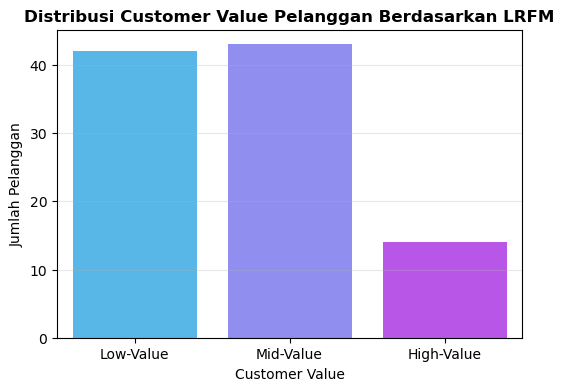

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='Customer_value',
    data=lrfm,
    palette='cool',
    order=['Low-Value', 'Mid-Value', 'High-Value']   # urut manual
)
plt.title('Distribusi Customer Value Pelanggan Berdasarkan LRFM', fontsize=12, fontweight='bold')
plt.xlabel('Customer Value')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.3)
plt.show()


Dari proporsi ketiga kategori berdasarkan Customer Value dapat disimpulkan bahwa:

**Low-Value Customers** merupakan kelompok dengan jumlah terbesar.
Ini menunjukkan masih banyak pelanggan yang memiliki frekuensi transaksi rendah, profit kecil, dan periode aktif yang pendek.
Pelanggan ini berisiko churn (berhenti berlangganan) jika tidak dilakukan strategi retensi.

**Mid-Value Customers** menempati posisi kedua terbanyak.
Kelompok ini merepresentasikan pelanggan aktif dengan kontribusi profit sedang.
Beberapa dari mereka dimungkinkan memiliki potensi besar untuk ditingkatkan ke kategori High-Value.

**High-Value Customers** memiliki jumlah paling sedikit, tetapi kontribusinya terhadap profit sangat besar (terkonfirmasi dari analisis Monetary dan profit distribution).
Kelompok ini mencerminkan pelanggan loyal dan konsisten yang memberikan dampak signifikan pada pendapatan jangka panjang.



Karena kita berfokus pada **Pelanggan Bernilai Tinggi**, pada analisis selanjutnya hanya akan terkonsentrasi pada pelanggan dilevel  **High-Value**. Alasan kenapa Mid-value disebutkan dalam proses analisa ini karena proporsi yang dominan memungkinkan untuk sebagian diantaranya berpotensi untuk ditingkatkan kedalam kategori **High-Value**. Tentunya akan ada proses filtering tertentu pada analisa kasus ini.

**Potential Mid-Value Customer (Flagged)**

Setelah dilakukan proses kategorisasi, ternyata ditemukan sebagian pelanggan dengan profit tinggi banyak ditemukan di kategori Mid-Value.

In [45]:
# Ambil 20 pelanggan dengan profit tertinggi
top20_profit = (
    lrfm.sort_values(by='Monetary', ascending=False)
        [['Customer', 'Monetary', 'Customer_value', 'Length', 'Recency', 'Frequency',
          'LRFM_Score', 'L_Score', 'R_Score', 'F_Score']]
        .head(20)
)

# Fungsi untuk highlight skor di bawah 4
def highlight_low_scores(val):
    color = 'background-color: blue' if val < 4 else ''
    return color

# Terapkan style hanya pada kolom L/R/F Score
styled_top20 = top20_profit.style.applymap(highlight_low_scores, subset=['L_Score','R_Score','F_Score'])

# Tampilkan hasil dengan highlight
styled_top20

C:\Users\calic\AppData\Local\Temp\ipykernel_23592\2266219877.py:15: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_top20 = top20_profit.style.applymap(highlight_low_scores, subset=['L_Score','R_Score','F_Score'])


,Customer,Monetary,Customer_value,Length,Recency,Frequency,LRFM_Score,L_Score,R_Score,F_Score
92,Valero Energy,10308.629700,Mid-Value,1368,16,58,11,2,2,3
28,Coca-Cola,9449.024600,Mid-Value,1393,10,38,11,3,3,1
88,Trafigura Group,8867.825200,Mid-Value,1392,8,52,12,3,3,2
62,Mondelez International,8577.652400,High-Value,1423,3,61,16,4,4,4
55,Lowes,7937.491500,High-Value,1433,8,58,14,4,3,3
56,Lukoil,7117.092200,High-Value,1427,3,53,15,4,4,3
80,Siemens,6519.510500,Mid-Value,1414,44,86,12,3,1,4
16,Bank of America Corp.,6449.855400,Mid-Value,1285,10,65,12,1,3,4
54,Kroger,6256.100500,High-Value,1432,2,76,16,4,4,4
10,Anthem,5953.203800,High-Value,1440,8,58,14,4,3,3


Kolom L_Score, R_Score, dan F_Score yang berwarna kuning (nilai <4) menandakan area perilaku pelanggan yang belum optimal.

- L_Score < 4 → pelanggan belum punya hubungan panjang (baru atau sporadis).
- R_Score < 4 → pelanggan sudah lama tidak bertransaksi (berisiko churn).
- F_Score < 4 → frekuensi transaksi masih jarang.



Hal ini menunjukkan bahwa sebagian pelanggan dengan profit besar belum mencapai perilaku yang **konsisten (frekuensi tinggi, recency rendah, atau durasi panjang)**. Artinya, pelanggan tersebut meskipun memberikan kontribusi profit tinggi, **belum memiliki loyalitas dan frekuensi pembelian yang konsisten**.  

Contoh:

Valero Energy, Coca-Cola, dan Trafigura Group termasuk Customer dengan profit sangat tinggi, tetapi L_Score, R_Score, dan F_Score masih rendah (2–3). Itu kenapa dikategorikan sebagai **Mid-Value**
→ Artinya pelanggan ini berpotensi churn, tapi jika diaktivasi ulang bisa jadi aset besar.

Mondelez International, Kroger, dan Allianz memiliki semua skor = 4.
→ Ini pelanggan ideal (loyal dan konsisten) yang perlu dijaga melalui retensi jangka panjang.

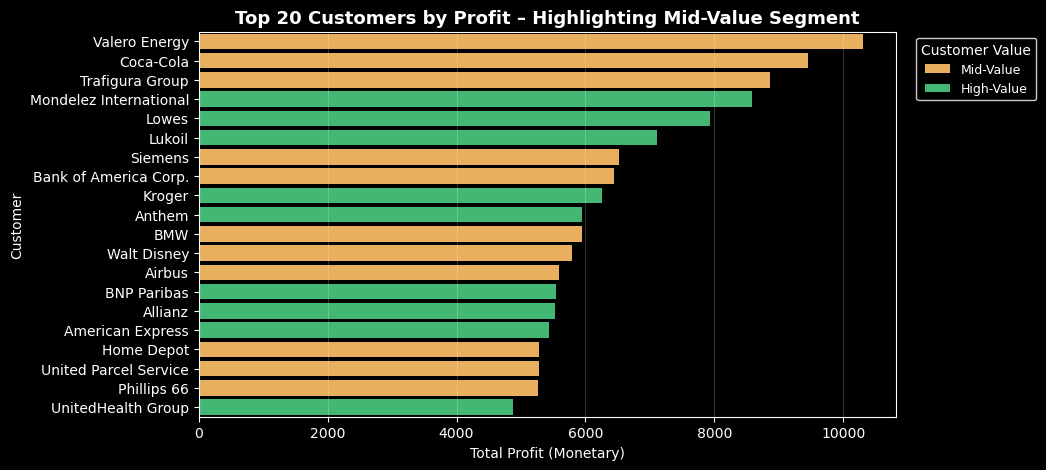

In [85]:


plt.figure(figsize=(9, 5))
plt.style.use('dark_background')  # dark AWS-style background

# Custom palette (soft yet vibrant)
palette = {
    'High-Value': '#2ECC71',  # green (success)
    'Mid-Value': '#FFB347',   # warm yellow-orange (highlight)
    'Low-Value': '#E74C3C'    # red (low tier)
}

# Horizontal bar chart for better readability
sns.barplot(
    data=top20_profit,
    y='Customer', x='Monetary',
    hue='Customer_value',
    palette=palette,
    dodge=False
)

# Title and labels
plt.title('Top 20 Customers by Profit – Highlighting Mid-Value Segment',
          fontsize=13, fontweight='bold', color='white')
plt.xlabel('Total Profit (Monetary)', color='white', fontsize=10)
plt.ylabel('Customer', color='white', fontsize=10)

# Grid and axes
plt.grid(axis='x', color='white', alpha=0.2)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# Legend styling
plt.legend(
    title='Customer Value',
    title_fontsize=10,
    fontsize=9,
    labelcolor='white',
    facecolor='black',
    edgecolor='white',
    bbox_to_anchor=(1.02, 1), loc='upper left'
)

# Wh



Visualisasi ini menunjukkan 20 pelanggan dengan profit tertinggi di seluruh kategori.  
Label dan warna kuning menandai pelanggan dengan kategori **Mid-Value** — 
menariknya, beberapa di antaranya memiliki profit yang lebih tinggi dibanding sebagian pelanggan High-Value.


Sebaliknya, pelanggan **High-Value** seperti Kroger, Allianz, dan Lukoil memiliki skor maksimal di semua dimensi, menandakan perilaku stabil dan keterlibatan tinggi.
Dengan strategi retensi yang tepat, pelanggan **Mid-Value berprofit tinggi** ini berpotensi besar untuk naik menjadi **High-Value customers**.

**Kesimpulan**

**Profit tinggi ≠ High-Value Customer.**
Sekitar setengah dari pelanggan berprofit tertinggi justru tergolong Mid-Value, menunjukkan mereka belum memiliki perilaku pembelian atau aktivitas yang stabil.

**Pelanggan Mid-Value berprofit tinggi = peluang besar**

Ada dua pilar utama pelanggan AWS:

1. Loyal High-Value (stabil tapi terbatas jumlahnya)

2. Mid-Value berprofit tinggi (belum konsisten tapi potensial)

Mid-Value dengan profit besar menjadi “hidden gem”:
Mereka menghasilkan uang, tapi belum menunjukkan pola loyalitas yang kuat → harus dijaga agar tidak churn.




**Behavioral & Profitability Analysis of Mid-Value Customers**

Filtering segment ke Mid-Level

In [47]:
mid_value = lrfm[lrfm['Customer_value'] == 'Mid-Value']
mid_value.shape
mid_value.head(50)


,Customer,Recency,Frequency,Monetary,Is_Loss,Length,R_Score,F_Score,M_Score,L_Score,LRFM_Score,Customer_value
0,AT&T,10,67,4520.6641,0,1381,3,4,4,2,13,Mid-Value
2,Aetna,22,76,3312.6698,0,1349,2,4,3,2,11,Mid-Value
3,Airbus,28,58,5593.3657,0,1423,1,3,4,4,12,Mid-Value
5,Allstate,2,61,-2796.2935,1,1410,4,4,1,3,12,Mid-Value
7,Amazon,14,62,2163.9843,0,1434,2,4,2,4,12,Mid-Value
11,Apple,3,50,3626.6249,0,1449,4,2,3,4,13,Mid-Value
12,Aviva,1,42,1474.3551,0,1445,4,2,2,4,12,Mid-Value
13,BMW,44,56,5948.0993,0,1391,1,3,4,3,11,Mid-Value
16,Bank of America Corp.,10,65,6449.8554,0,1285,3,4,4,1,12,Mid-Value
18,Boeing,5,49,666.5414,0,1426,4,2,1,4,11,Mid-Value


Compare antara masing-masing value

In [48]:
# Filter hanya segmen High-Value dan Mid-Value
compare_hm = (
    lrfm[lrfm['Customer_value'].isin(['High-Value', 'Mid-Value'])]
    .groupby('Customer_value')[['Length', 'Recency', 'Frequency', 'Monetary']]
    .mean()
    .round(2)
)

compare_hm


,Length,Recency,Frequency,Monetary
Customer_value,,,,
High-Value,1416.79,4.29,68.50,5371.42
Mid-Value,1395.44,12.79,58.16,3357.96


C:\Users\calic\AppData\Local\Temp\ipykernel_23592\3910023390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


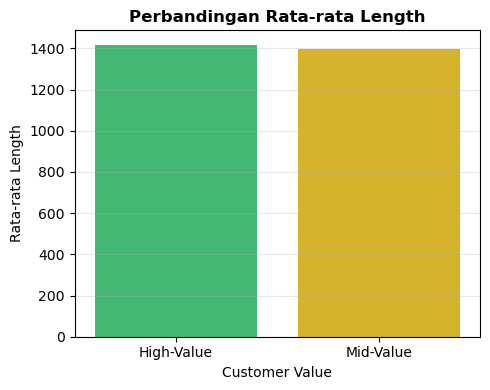

In [49]:
plt.figure(figsize=(5,4))
sns.barplot(
    data=compare_hm.reset_index(),
    x='Customer_value', y='Length',
    palette={'High-Value':'#2ecc71','Mid-Value':'#f1c40f'}
)
plt.title('Perbandingan Rata-rata Length', fontsize=12, fontweight='bold')
plt.xlabel('Customer Value')
plt.ylabel('Rata-rata Length')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\calic\AppData\Local\Temp\ipykernel_23592\1480333280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


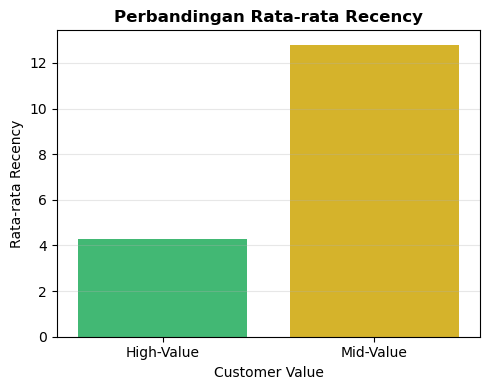

In [50]:
plt.figure(figsize=(5,4))
sns.barplot(
    data=compare_hm.reset_index(),
    x='Customer_value', y='Recency',
    palette={'High-Value':'#2ecc71','Mid-Value':'#f1c40f'}
)
plt.title('Perbandingan Rata-rata Recency', fontsize=12, fontweight='bold')
plt.xlabel('Customer Value')
plt.ylabel('Rata-rata Recency')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\calic\AppData\Local\Temp\ipykernel_23592\2859042844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


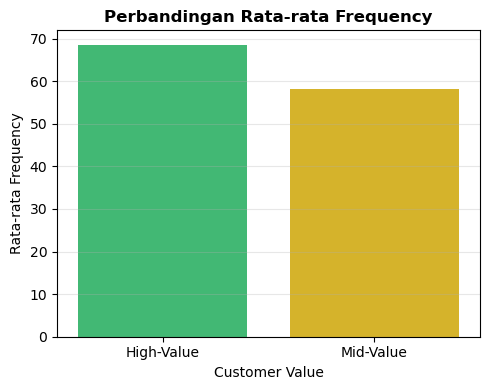

In [51]:
plt.figure(figsize=(5,4))
sns.barplot(
    data=compare_hm.reset_index(),
    x='Customer_value', y='Frequency',
    palette={'High-Value':'#2ecc71','Mid-Value':'#f1c40f'}
)
plt.title('Perbandingan Rata-rata Frequency', fontsize=12, fontweight='bold')
plt.xlabel('Customer Value')
plt.ylabel('Rata-rata Frequency')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\calic\AppData\Local\Temp\ipykernel_23592\2859042844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


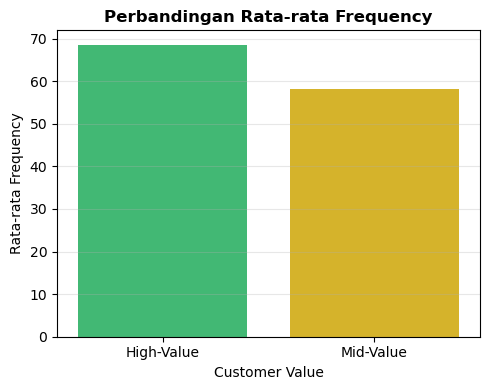

In [52]:
plt.figure(figsize=(5,4))
sns.barplot(
    data=compare_hm.reset_index(),
    x='Customer_value', y='Frequency',
    palette={'High-Value':'#2ecc71','Mid-Value':'#f1c40f'}
)
plt.title('Perbandingan Rata-rata Frequency', fontsize=12, fontweight='bold')
plt.xlabel('Customer Value')
plt.ylabel('Rata-rata Frequency')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Dari perbandingan ini dapat dijelaskan:

1. Mid-Value **bukan pelanggan baru**, tapi **pelanggan lama yang mulai pasif** :
Mereka memiliki Length tinggi, tapi Recency juga tinggi → artinya mereka dulu aktif, kini jarang menggunakan layanan.

2. Perbedaan utama High vs Mid bukan di durasi, tapi di perilaku transaksi :
High-Value **lebih sering (Frequency)** dan **baru-baru ini aktif (Recency rendah)**,
sedangkan Mid-Value lebih jarang dan sudah lama tidak bertransaksi.

3. Profit Mid-Value masih besar, artinya mereka **termasuk pelanggan penting** — hanya saja belum konsisten: 
Ini menandakan peluang besar untuk **program reaktivasi dan konversi ke High-Value**.

Setelah itu cek distribusi berdasarkan profit

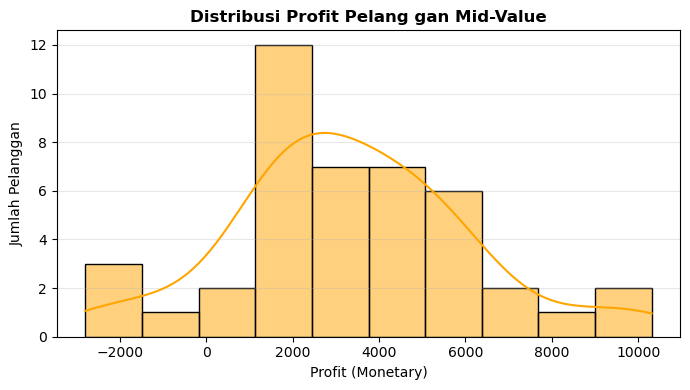

In [53]:
plt.figure(figsize=(7,4))
sns.histplot(mid_value['Monetary'], kde=True, bins=10, color='orange')
plt.title('Distribusi Profit Pelang gan Mid-Value', fontsize=12, fontweight='bold')
plt.xlabel('Profit (Monetary)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Grafik menunjukkan bahwa sebagian besar pelanggan Mid-Value memiliki profit pada kisaran **1.000–5.000**, 
dengan beberapa pelanggan mencapai profit sangat tinggi (8.000–10.000). 
Bentuk distribusi yang condong ke kanan menandakan bahwa rata-rata profit segmen ini 
didominasi oleh sejumlah kecil pelanggan besar.

Sebagian kecil pelanggan bahkan mencatatkan **profit negatif**, 
yang mengindikasikan adanya potensi inefisiensi biaya atau kebijakan diskon besar.

Temuan ini menunjukkan dua hal penting:
1. Mayoritas pelanggan Mid-Value menghasilkan profit moderat namun stabil.  
2. Ada kelompok kecil pelanggan Mid-Value dengan profit tinggi yang berpotensi untuk dikonversi menjadi High-Value 
melalui peningkatan frekuensi dan engagement.


Cek 10 Top Performer 

Dalam bagian ini, ingin mencari 10 top customer yang potensial. Karena konteks bisnis, variabel *Monetary*  menjadi variabel utama dalam proses sortir value. Hal ini dilakukan karena, mempertimbangkan top 10 performer customer ini memiliki kontribusi besar dalam bisnis AWS.

In [54]:
top10_mid = (
    mid_value.sort_values(by='Monetary', ascending=False)
    [['Customer','Monetary','Length','Recency','Frequency','LRFM_Score','L_Score','R_Score','F_Score']]
    .head(10)
)
top10_mid

,Customer,Monetary,Length,Recency,Frequency,LRFM_Score,L_Score,R_Score,F_Score
92,Valero Energy,10308.6297,1368,16,58,11,2,2,3
28,Coca-Cola,9449.0246,1393,10,38,11,3,3,1
88,Trafigura Group,8867.8252,1392,8,52,12,3,3,2
80,Siemens,6519.5105,1414,44,86,12,3,1,4
16,Bank of America Corp.,6449.8554,1285,10,65,12,1,3,4
13,BMW,5948.0993,1391,44,56,11,3,1,3
97,Walt Disney,5786.8297,1346,23,53,10,2,1,3
3,Airbus,5593.3657,1423,28,58,12,4,1,3
45,Home Depot,5279.8129,1370,14,51,10,2,2,2
90,United Parcel Service,5275.6332,1397,13,37,10,3,2,1


Tabel ini menunjukkan 10 pelanggan Mid-Value dengan profit terbesar, yang secara finansial sudah sangat menguntungkan, 
namun belum menunjukkan perilaku pelanggan High-Value secara penuh.

Sebagian besar pelanggan memiliki:
- **Length tinggi (≥1300 hari)** → hubungan jangka panjang dengan AWS,
- **Recency tinggi (8–28 hari)** → aktivitas terkini masih jarang,
- **Frequency sedang (38–86 transaksi)** → belum terlalu sering bertransaksi,
- **Skor L, R, F di bawah 4** → belum memenuhi kriteria pelanggan paling loyal.

Dengan demikian, pelanggan Mid-Value berprofit tinggi ini adalah kelompok **“hidden gems”**:
mereka memberikan profit besar tetapi belum stabil secara perilaku. 

Strategi utama:
1. **Reaktivasi pelanggan dengan Recency tinggi** (semisal untuk Walt Disney, Airbus).  
2. **Dorong pelanggan aktif (seperti Siemens dan Bank of America Corp.)** agar naik ke High-Value dengan cara *Personalized Account Management*.  
3. **Bangun program engagement & loyalty berbasis profit** untuk mempertahankan kontribusi mereka.

Jika AWS dapat meningkatkan frekuensi dan aktivitas pelanggan-pelanggan ini, 
maka mereka berpotensi besar menjadi **High-Value Customers** dan memberikan dampak signifikan terhadap profit jangka panjang.


**Kesimpulan**

Segmen Mid-Value mewakili pelanggan dengan skor LRFM menengah, 
yang menunjukkan *kontribusi profit signifikan* namun *perilaku transaksi belum stabil (skor R & F belum optimal)*.  
Analisis ini bertujuan untuk memahami karakteristik mereka dan mengidentifikasi strategi peningkatan loyalitas.

Hasil deskriptif menunjukkan bahwa pelanggan Mid-Value memiliki:
- Nilai **profit (Monetary)** yang tinggi,
- Tetapi **Recency dan Frequency** yang relatif lebih rendah dibanding pelanggan High-Value.

Temuan ini mengindikasikan bahwa sebagian pelanggan Mid-Value berpotensi menjadi 
**High-Value Customers** jika diberikan strategi peningkatan frekuensi penggunaan dan engagement yang tepat.  
Program retensi berbasis data seperti **usage credit, engagement & loyalty bonus, atau personalized account management** 
dapat menjadi langkah strategis untuk meningkatkan nilai jangka panjang segmen ini. Dan untuk pelanggan yang tingkat recencynya sudah lumayan tinggi bisa dilakukan **Reactivation**


**Analisa High-Value Customer**

Pertama-tama kita perlu melakukan filtering hanya fokus pada High-Value Customer

In [55]:
# Filter hanya pelanggan High-Value
high_value = lrfm[lrfm['Customer_value'] == 'High-Value']

# Urutkan berdasarkan skor LRFM tertinggi
high_value_sorted = high_value.sort_values(by='LRFM_Score', ascending=False)

# Tampilkan semua (karena cuma ada 14 customer)
high_value_sorted.head(14)

,Customer,Recency,Frequency,Monetary,Is_Loss,Length,R_Score,F_Score,M_Score,L_Score,LRFM_Score,Customer_value
54,Kroger,2,76,6256.1005,0,1432,4,4,4,4,16,High-Value
53,Johnson & Johnson,2,67,4632.4593,0,1438,4,4,4,4,16,High-Value
62,Mondelez International,3,61,8577.6524,0,1423,4,4,4,4,16,High-Value
56,Lukoil,3,53,7117.0922,0,1427,4,3,4,4,15,High-Value
4,Allianz,2,102,5531.8834,0,1383,4,4,4,3,15,High-Value
8,American Express,8,71,5436.2589,0,1393,3,4,4,3,14,High-Value
23,Chevron,5,77,3569.8980,0,1403,4,4,3,3,14,High-Value
14,BNP Paribas,3,81,5550.8063,0,1360,4,4,4,2,14,High-Value
10,Anthem,8,58,5953.2038,0,1440,3,3,4,4,14,High-Value
9,AmerisourceBergen,4,68,4202.8824,0,1403,4,4,3,3,14,High-Value


Setelah sudah difilter, cek statistik deskriptifnya masih didalam konteks post-analysis LRFM

In [56]:
high_stats = (
    high_value[['Length','Recency','Frequency','Monetary']]
    .describe()
    .round(2)
)
high_stats

,Length,Recency,Frequency,Monetary
count,14.00,14.00,14.00,14.00
mean,1416.79,4.29,68.50,5371.42
std,25.61,2.30,13.06,1752.93
min,1360.00,2.00,53.00,2728.76
25%,1403.00,3.00,58.00,4310.28
50%,1425.00,3.00,67.50,5484.07
75%,1434.50,5.75,75.25,6180.38
max,1452.00,8.00,102.00,8577.65


Berdasarkan hasil deskriptif, pelanggan High-Value AWS memiliki karakteristik sebagai berikut:

- **Length:** Rata-rata 1416 hari (~3,8 tahun), dengan variasi kecil, menunjukkan hubungan jangka panjang yang stabil.
- **Recency:** Rata-rata 4 hari, artinya pelanggan baru saja melakukan transaksi atau pembaruan layanan.
- **Frequency:** Rata-rata 68 transaksi, menunjukkan tingkat aktivitas yang tinggi dan konsisten.
- **Monetary:** Rata-rata profit sekitar 5371, dengan nilai maksimum mencapai 8577.

Temuan ini menunjukkan bahwa pelanggan High-Value:
- Memiliki **loyalitas tinggi dan engagement aktif**,  
- Memberikan **kontribusi profit besar secara stabil**,  
- Dan menunjukkan **perilaku penggunaan jangka panjang** tanpa jeda signifikan.


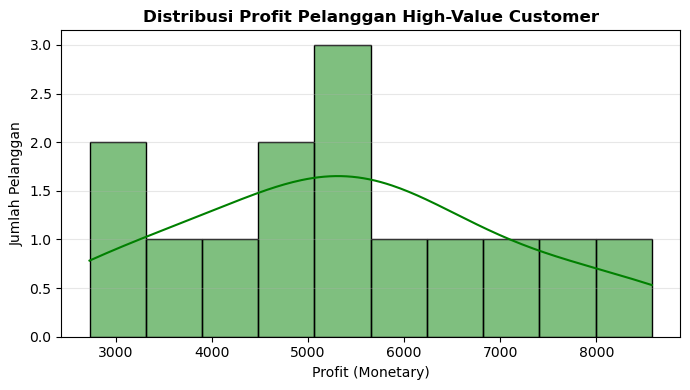

In [57]:
plt.figure(figsize=(7,4))
sns.histplot(high_value['Monetary'], kde=True, bins=10, color='green')
plt.title('Distribusi Profit Pelanggan High-Value Customer', fontsize=12, fontweight='bold')
plt.xlabel('Profit (Monetary)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Pelanggan High-Value AWS memiliki profit yang tinggi dan terdistribusi stabil, menandakan hubungan yang kuat dan tingkat kepuasan tinggi.
Mereka tidak hanya bertransaksi sering, tetapi juga berkontribusi dalam nilai profit yang hampir seragam — ini menandakan basis pelanggan premium yang sehat dan terkendali.

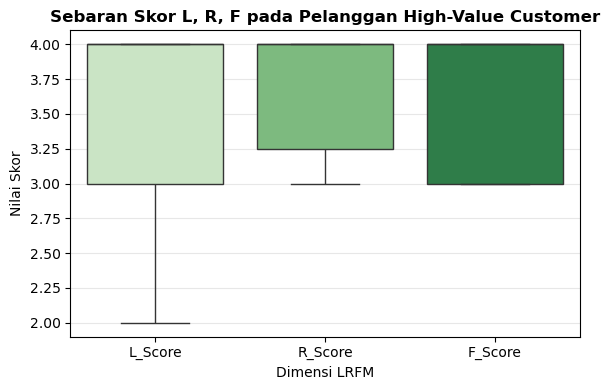

In [58]:
plt.figure(figsize=(6,4))
sns.boxplot(data=high_value[['L_Score','R_Score','F_Score']], palette='Greens')
plt.title('Sebaran Skor L, R, F pada Pelanggan High-Value Customer', fontsize=12, fontweight='bold')
plt.xlabel('Dimensi LRFM')
plt.ylabel('Nilai Skor')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Sebaran Skor L, R, dan F pada Pelanggan High-Value

Boxplot menunjukkan bahwa pelanggan High-Value AWS memiliki skor tinggi dan stabil pada seluruh dimensi LRFM:

- **L_Score:** Mayoritas berada pada nilai 3–4, menandakan hubungan jangka panjang dan konsisten.
- **R_Score:** Semua pelanggan baru saja aktif (Recency rendah, skor tinggi).
- **F_Score:** Pelanggan bertransaksi sering, menunjukkan engagement tinggi.

Secara keseluruhan, pelanggan High-Value memperlihatkan **profil ideal**:
mereka loyal, aktif, dan memberikan kontribusi profit yang berkelanjutan.  


Rekomendasi Strategi utama bagi segmen ini adalah  **retensi premium, peningkatan hubungan personal, dan pengembangan program loyalitas eksklusif.**

**Analisa Lintas Dimensi**

Untuk fase ini diperlu dilakukan tindakan menambahkan kolom Customer_value (hasil segmentasi LRFM) ke df utama. Hal ini bertujuan untuk langkah kunci menganalisa dengan perspektif lebih kontekstual dan jalan untuk terhubung dengan faktor-faktor variabel lain, seperti **Industry, Region, Sales_Tier, Segment**, atau bahkan **Contact Name** dan **Discount**.

In [59]:
df_merged = df.merge(
    lrfm[['Customer', 'Customer_value']],  # ambil hanya kolom Customer dan segmentasi
    on='Customer',
    how='left'
)

# Cek hasil
df_merged.head(10)
        

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Year,Customer_value
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,2022,High-Value
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,2022,High-Value
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,2022,Mid-Value
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,2021,High-Value
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,2021,High-Value
5,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,48.8600,7,0.00,14.1694,2020,High-Value
6,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,7.2800,4,0.00,1.9656,2020,High-Value
7,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,907.1520,6,0.20,90.7152,2020,High-Value
8,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,18.5040,3,0.20,5.7825,2020,High-Value
9,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,OneView,114.9000,5,0.00,34.4700,2020,High-Value


In [60]:
high_df = df_merged[df_merged['Customer_value'] == 'High-Value'].copy()
high_df.head()  

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Year,Customer_value
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,2022,High-Value
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,2022,High-Value
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,2021,High-Value
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,2021,High-Value
5,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,48.8600,7,0.00,14.1694,2020,High-Value


**Analisa Deskriptif berdasarkan beberapa variabel kontekstual (Industri, Wilayah, Volume Penjualan)**

Tujuannya untuk menggali karakteristik pelanggan High-Value secara lebih dalam, satu variabel kontekstual per satu waktu bukan cuma ringkasan angka, tapi juga pola perilaku, kontribusi profit, dan implikasi bisnisnya.

In [61]:
df.columns

Index(['Order ID', 'Order Date', 'Date Key', 'Contact Name', 'Country', 'City',
       'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment',
       'Product', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year'],
      dtype='object')

In [62]:
lrfm.columns


Index(['Customer', 'Recency', 'Frequency', 'Monetary', 'Is_Loss', 'Length',
       'R_Score', 'F_Score', 'M_Score', 'L_Score', 'LRFM_Score',
       'Customer_value'],
      dtype='object')

Gabung kolom 

In [63]:
df_lrfm = df.merge(
    lrfm[['Customer', 'Length', 'Recency', 'Frequency', 'Monetary',
          'L_Score', 'R_Score', 'F_Score','M_Score', 'LRFM_Score', 'Customer_value']],
    on='Customer',
    how='left'
)

# Cek hasilnya
df_lrfm.head(50)

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,...,Length,Recency,Frequency,Monetary,L_Score,R_Score,F_Score,M_Score,LRFM_Score,Customer_value
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,1403,5,77,3569.8980,3,4,4,3,14,High-Value
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,1403,5,77,3569.8980,3,4,4,3,14,High-Value
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,...,1388,13,45,5259.8958,3,2,2,4,11,Mid-Value
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,1452,3,57,2828.7475,4,4,3,3,14,High-Value
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,1452,3,57,2828.7475,4,4,3,3,14,High-Value
5,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,...,1360,3,81,5550.8063,2,4,4,4,14,High-Value
6,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,...,1360,3,81,5550.8063,2,4,4,4,14,High-Value
7,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,...,1360,3,81,5550.8063,2,4,4,4,14,High-Value
8,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,...,1360,3,81,5550.8063,2,4,4,4,14,High-Value
9,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,...,1360,3,81,5550.8063,2,4,4,4,14,High-Value


Karena kolom hasil analisis LRFM (Length, Recency, Frequency, Monetary) 
masih terpisah dari dataset utama yang memuat konteks pelanggan (seperti Industry, Region, Sales, dsb), 
dilakukan proses penggabungan (merge) berdasarkan kolom unik pelanggan (`Customer`).

Langkah ini menghasilkan satu dataset terpadu (`df_lrfm`) 
yang mengandung semua informasi perilaku pelanggan dan variabel kontekstual.
Dataset gabungan ini digunakan untuk seluruh analisis deskriptif dan eksplorasi pola antar variabel pelanggan bernilai tinggi.

Variabel nilai perilaku pelanggan → Length, Recency, Frequency, Monetary, Customer_value, LRFM_Score

Variabel kontekstual bisnis → Industry, Region, Sales, Profit, Discount

1. Analisa Industry

Konsentrasi hanya di High-Value Customer

In [64]:
# Fokus High-Value
high_df = df_lrfm[df_lrfm['Customer_value'] == 'High-Value']

# Analisis deskriptif per industri
industry_analysis = (
    high_df.groupby('Industry')[['Monetary','Frequency','Recency','Length']]
    .mean()
    .round(2)
    .sort_values(by='Monetary', ascending=False)
)
industry_analysis

,Monetary,Frequency,Recency,Length
Industry,,,,
Consumer Products,8577.65,61.00,3.00,1423.00
Retail,7011.01,67.92,4.69,1432.45
Healthcare,4898.54,62.82,4.29,1423.22
Finance,4840.44,83.24,4.49,1392.06
Energy,4453.71,63.82,3.81,1424.54


Pelanggan High-Value hanya terkonsentrasi pada 5 Industri, yaitu Energi, Finance, Consumer Products, Healthcare, Retail.

Semua industri menunjukkan Length tinggi (~1.400 hari) → artinya pelanggan High-Value AWS memiliki hubungan jangka panjang (± 4 tahun) dengan layanan AWS.

Profit (Monetary) dan aktivitas transaksi (Frequency) bervariasi antar industri.

C:\Users\calic\AppData\Local\Temp\ipykernel_23592\3278637650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_df, x='Monetary', y='Industry', palette='Greens', estimator='mean')


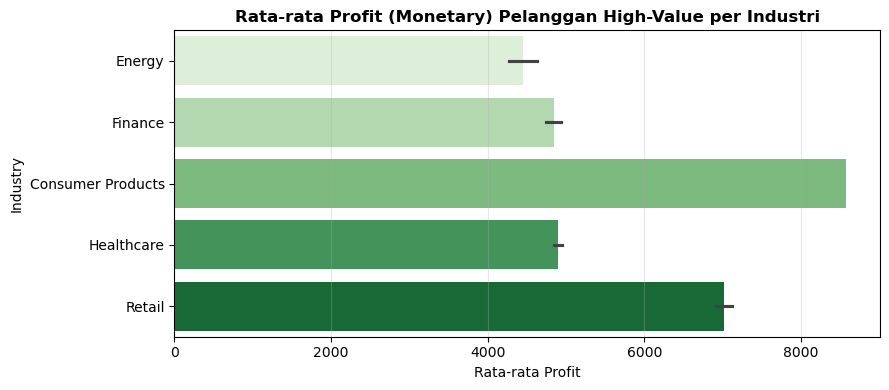

In [65]:
plt.figure(figsize=(9,4))
sns.barplot(data=high_df, x='Monetary', y='Industry', palette='Greens', estimator='mean')
plt.title('Rata-rata Profit (Monetary) Pelanggan High-Value per Industri', fontsize=12, fontweight='bold')
plt.xlabel('Rata-rata Profit')
plt.ylabel('Industry')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Analisa Komparasi per Industry konsentrasi pada High-Value Customer

1. Consumer Products
- Profit tertinggi (8577) di antara semua industri, walau frekuensi transaksi relatif rendah (61).
- Recency rendah (3.0) → pelanggan baru-baru ini aktif.
- Pola ini menunjukkan pelanggan dengan volume transaksi besar tapi jarang — pola enterprise contract multi-tahun.

2. Retail
- Profit tinggi (7011) dan Length tertinggi (1432) → pelanggan paling lama & loyal.
- Frequency sedang (68) dan Recency menengah (4.7) → pelanggan aktif, stabil, tapi tidak seintens sektor Finance.

3. Finance
- Frekuensi transaksi tertinggi (83) tapi profit relatif moderat (4840).
- Recency 4.49 → pelanggan aktif baru-baru ini.

4. Healthcare
- Profit menengah (4898) dan aktivitas stabil (Frequency 63, Recency 4.2, Length 1432).
- Menunjukkan pelanggan yang moderate, stabil, dan jangka panjang.

5. Energy
- Profit paling rendah (4453) tapi Recency paling rendah (3.8) jika dibandingkan dengan 4 yang lain→ pelanggan baru aktif lagi (recent engagement).
- Length tinggi (1424) menunjukkan mereka adalah pelanggan lama yang kembali aktif.


Terjadi variasi perilaku signifikan antar industri.
1. Consumer Products & Retail → profit leader (kontrak besar, loyalitas tinggi).
2. Finance → activity leader (transaksi sering tapi margin kecil). 
3. Healthcare → steady long-term users.
4. Energy → reactivated clients dengan potensi pertumbuhan.

Semua industri menunjukkan loyalitas jangka panjang (Length ~1400 hari).

**Kesimpulan**
Pelanggan bernilai tinggi AWS tidak homogen. Meskipun semuanya termasuk High-Value, mereka memiliki pola profitabilitas, aktivitas, dan loyalitas yang berbeda antar industri.

| Industri              | Ciri Utama                      | Fokus Strategi AWS                       |
| --------------------- | ------------------------------- | ---------------------------------------- |
| **Consumer Products** | Profit besar, frekuensi rendah  | Retensi & kontrak enterprise             |
| **Retail**            | Loyalitas tinggi, profit stabil | Loyalty & AI upselling                   |
| **Finance**           | Frekuensi tinggi, margin kecil  | Margin optimization & compliance service |
| **Healthcare**        | Aktivitas stabil, loyal         | Data governance & HIPAA compliance       |
| **Energy**            | Profit kecil, baru aktif        | Cross-sell IoT & predictive analytics    |

Rekomendasi Strategis kedepan:

1. **Segmented Retention**:
Fokuskan **retensi premium** untuk sektor Consumer Products & Retail yang memberi **kontribusi profit terbesar**.

2.  **Enterprise Loyalty Program**
Fokuskan menjaga loyalitas pelanggan Enterprise melalui **program kemitraan strategis jangka panjang** dan dorong **upselling untuk menambah nilai tambah berkelanjutan**.

2. **Margin Growth Strategy**:
**Perkuat layanan compliance dan data-security** di sektor Finance untuk meningkatkan **profit per transaksi**.

3. **Optimalize Reactivation Program**:
Manfaatkan **momentum aktivitas baru** di sektor Energy dengan **bundling AWS IoT + AI Service**.

4. **Healthcare Specialization**:
Perkuat posisi AWS di sektor Healthcare melalui **layanan compliance dan storage medical-grade**.


2. Analisa Wilayah

In [66]:
region_analysis = (
    high_df.groupby('Region')[['Monetary','Frequency','Recency','Length']]
    .mean().round(2)
    .sort_values(by='Monetary', ascending=False)
)
region_analysis

,Monetary,Frequency,Recency,Length
Region,,,,
EMEA,5391.49,69.79,4.25,1414.33
AMER,5356.57,70.15,4.19,1415.50
APJ,5186.02,71.39,4.21,1412.46


C:\Users\calic\AppData\Local\Temp\ipykernel_23592\2525577547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_df, x='Monetary', y='Region', palette='Greens', estimator='mean')


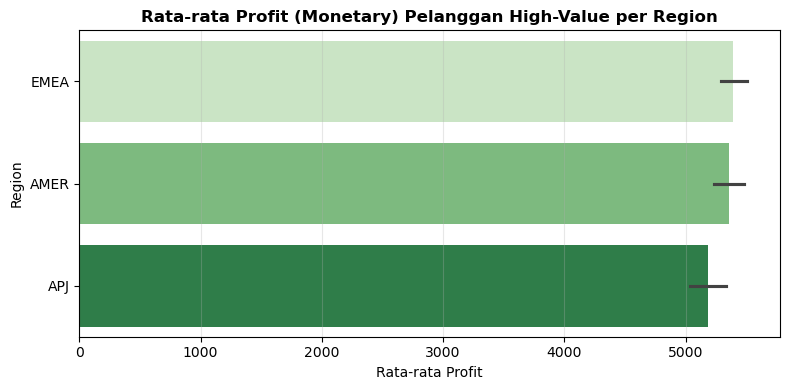

In [67]:
plt.figure(figsize=(8,4))
sns.barplot(data=high_df, x='Monetary', y='Region', palette='Greens', estimator='mean')
plt.title('Rata-rata Profit (Monetary) Pelanggan High-Value per Region', fontsize=12, fontweight='bold')
plt.xlabel('Rata-rata Profit')
plt.ylabel('Region')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Analisa Komparasi per Region konsentrasi pada High-Value Customer

1. EMEA (Europe, Middle East, Africa)
- Profit tertinggi (Monetary 5391.49) perbandingannya sedikit lebih tinggi di antara region lain → pelanggan High-Value di wilayah ini paling besar kontribusinya terhadap profit.
- Frequency (69.79) menunjukkan aktivitas stabil — pelanggan rutin memperbarui atau menambah layanan cloud.
- Recency (4.25) rendah → pelanggan baru-baru ini aktif.
- Length (1414) juga tinggi → loyalitas jangka panjang (±4 tahun).

2. AMER (Amerika Utara & Selatan)
- Profit kedua tertinggi (5356.57), hampir setara EMEA.
- Frequency (70.15) sedikit lebih tinggi → pelanggan aktif dan melakukan update berkala.
- Recency (4.19) paling rendah → pelanggan baru saja bertransaksi.
- Length (1415.5) tertinggi → pelanggan paling lama & stabil.


3. APJ (Asia-Pacific & Japan)
- Profit sedikit lebih rendah (5186) dibanding region lain, tapi Frequency tertinggi (71.39) → pelanggan sering bertransaksi, meskipun nilai per transaksi lebih kecil.
- Recency (4.21) masih rendah → mereka baru-baru ini aktif.
- Length (1412) sedikit lebih pendek → pelanggan relatif baru tapi cepat tumbuh.


Tidak ada perbedaan ekstrem antar region, tapi AWS dapat memaksimalkan potensi lokal.
EMEA memimpin dalam profit, AMER unggul dalam loyalitas, dan APJ unggul dalam pertumbuhan aktivitas.



Sekarang analisa Per Negara

In [68]:
country_summary = (
    high_df.groupby('Country')[['Monetary', 'Frequency', 'Recency', 'Length']]
    .mean()
    .round(2)
    .reset_index()
)
country_summary.head(50)

,Country,Monetary,Frequency,Recency,Length
0,Argentina,5333.62,69.23,5.05,1417.09
1,Australia,5132.27,72.36,4.33,1411.81
2,Austria,5019.83,59.89,2.78,1439.22
3,Belgium,5116.32,68.50,4.28,1412.17
4,Brazil,5045.14,65.62,4.58,1422.31
5,Canada,5536.15,70.45,3.63,1414.25
6,Chile,5628.74,67.31,3.88,1417.09
7,China,5323.66,69.30,5.67,1408.44
8,Colombia,7117.09,53.00,3.00,1427.00
9,Costa Rica,4816.40,66.80,5.60,1426.60


In [ ]:
import plotly.express as px

fig = px.choropleth(
    country_summary,
    locations="Country",
    locationmode="country names",
    color="Monetary",
    hover_name="Country",
    hover_data=["Frequency", "Recency", "Length"],
    color_continuous_scale="Greens",
    title="Geo Heatmap – Rata-rata Profit (Monetary) Pelanggan High-Value AWS per Negara"
)

fig.update_geos(showframe=False, showcoastlines=True, projection_type="equirectangular")
fig.update_layout(title_font_size=14, title_x=0.5)
fig.show()


Pola Penting per Variabel

1. **Monetary (Profit)**

- Top 5 negara dengan profit tertinggi:
    1. Croatia ≈ 8 578
    2. Turkey ≈ 6 917
    3. Israel ≈ 6 968
    4. Ukraine ≈ 6 428
    5. UAE ≈ 6 092
- Negara-negara Eropa Timur & Timur Tengah mendominasi profit tinggi.
- Negara dengan profit menengah (≈ 5 000–5 500) meliputi Kanada, Prancis, Jerman, Jepang, Singapura, Korea Selatan, Inggris → menggambarkan pasar mature SaaS.
- Profit terendah di Qatar (≈ 2 828) menunjukkan pelanggan bernilai tinggi tapi dengan transaksi terbatas.

2. **Frequency (Aktivitas)**

- Top 5 negara Dengan aktifitas tertinggi: 
    1. Netherlands (81)
    2. Philippines (74.8)
    3. India (74.2) 
    4. Taiwan (76.2) 
    5. Poland (77.4). 
- Negara-negara ini aktif bertransaksi kecil-menengah
- Terendah: Qatar (57), Croatia (61), Turkey (61) → frekuensi rendah namun profit besar ⇒ transaksi bernilai tinggi.

3. **Recency**

- Hampir semua negara memiliki Recency < 6, menandakan pelanggan masih aktif dalam periode terkini.
- Recency terendah (aktivitas terbaru): Czech Republic (2.75), Israel (2.56), Taiwan (2.75).
- Mereka baru-baru ini melakukan transaksi → engagement tinggi.
- Recency tertinggi (lebih lama tidak transaksi): China (5.67), Greece (5.38), Costa Rica (5.6) → potensi re-engagement campaign.

4. **Length (Durasi Loyalitas)**

- Konsisten di kisaran 1 400–1 440 hari, menandakan seluruh High-Value Customer rata-rata sudah bersama AWS selama ± 3,8 tahun.
- Longest: Austria (1 439), Turkey (1 430), Ireland (1 431) → pelanggan lama & stabil.
- Shortest: Netherlands (1 360), Indonesia (1 377) → pelanggan baru dengan pertumbuhan cepat.

| Wilayah                        | Karakteristik High-Value                                                     | Interpretasi di Industri SaaS                                                                                   |
| ------------------------------ | ---------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------- |
| **Eropa Barat & Utara**        | Frequency & Length tinggi (Belanda, Jerman, UK, Prancis, Finlandia)          | Pasar matang, pelanggan tingkat menengah keatas stabil. AWS dapat fokus ke retensi & program efisiensi biaya.    |
| **Eropa Timur & Timur Tengah** | Profit tinggi tapi Frequency rendah (Croatia, Turkey, Israel, UAE)           | Transaksi bernilai besar, cocok untuk solusi *custom enterprise support*  |
| **Asia-Pasifik**               | Frequency sangat tinggi (India, Taiwan, Indonesia, Korea) tapi profit sedang | Pasar pertumbuhan cepat, pelanggan baru aktif; peluang ekspansi dan upselling.                      |
| **Amerika**                    | Profit & frequency seimbang (AS, Kanada, Brasil, Meksiko)                    | Pasar stabil, pelanggan jangka panjang dengan adopsi SaaS yang matang.                              |


**Kesimpulan**

Secara global, pelanggan High-Value AWS menunjukkan engagement tinggi dan loyalitas kuat di seluruh negara (Length ≈ 1 400 hari, Recency < 5).
Namun, pola perbedaan muncul di karakter profit dan aktivitas transaksi:

- Negara Eropa Timur / Timur Tengah → high-margin, low-frequency clients.
- Negara APAC → low-margin, high-frequency clients.
- Negara Barat → pasar Stabil dengan tingkat retensi tinggi.

*Catatan: low-margin yang dimaksud adalah situasi terendah diantara high-value customer*

**Rekomendasi Strategis**

- Eropa Timur / Timur Tengah – Kembangkan **premium enterprise support** 
- APAC – Dorong **growth expansion programs, upselling, dan insentif volume-based**.
- Eropa Barat / Amerika – Pertahankan pelanggan **loyal** dengan **program modernization credits & long-term contracts**.

3. Analisa Volume Penjualan (*Sales*)

In [70]:
high_df.head(50)

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,...,Length,Recency,Frequency,Monetary,L_Score,R_Score,F_Score,M_Score,LRFM_Score,Customer_value
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,1403,5,77,3569.8980,3,4,4,3,14,High-Value
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,1403,5,77,3569.8980,3,4,4,3,14,High-Value
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,1452,3,57,2828.7475,4,4,3,3,14,High-Value
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,1452,3,57,2828.7475,4,4,3,3,14,High-Value
5,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,...,1360,3,81,5550.8063,2,4,4,4,14,High-Value
6,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,...,1360,3,81,5550.8063,2,4,4,4,14,High-Value
7,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,...,1360,3,81,5550.8063,2,4,4,4,14,High-Value
8,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,...,1360,3,81,5550.8063,2,4,4,4,14,High-Value
9,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,...,1360,3,81,5550.8063,2,4,4,4,14,High-Value
10,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,...,1360,3,81,5550.8063,2,4,4,4,14,High-Value


Sebelum masuk analisa, High-Value Customer Sales kali ini akan dibagi menjadi 3 kelas:
1. Low Sales Tier – pelanggan dengan volume paling kecil
2. Mid Sales Tier – pelanggan dengan volume menengah
3. High Sales Tier – pelanggan dengan volume terbesar

In [71]:
bins = [0, 1000, 5000, df_lrfm['Sales'].max()]
labels = ['Low Sales', 'Mid Sales', 'High Sales']

df_lrfm['Sales_Tier'] = pd.cut(df_lrfm['Sales'], bins=bins, labels=labels, include_lowest=True)


Batas antar kategori (Manual Binning):

0–1000 → Low Sales 

1000–5000 → Mid Sales

5000 hingga max(Sales) → High Sales

Angka 4000 dan 7000 kamu pilih sebagai cut-off untuk memisahkan pelanggan kecil, menengah, dan besar, berdasarkan insight distribusi sebelumnya.

In [72]:
tier_behavior = (
    df_lrfm[df_lrfm['Customer_value'] == 'High-Value']
    .groupby('Sales_Tier')[['L_Score', 'R_Score', 'F_Score', 'M_Score']]
    .mean()
    .round(2)
    .sort_index()
)
tier_behavior

C:\Users\calic\AppData\Local\Temp\ipykernel_23592\943125849.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,L_Score,R_Score,F_Score,M_Score
Sales_Tier,,,,
Low Sales,3.46,3.72,3.70,3.70
Mid Sales,3.28,3.76,3.65,3.78
High Sales,4.00,3.43,3.29,4.00


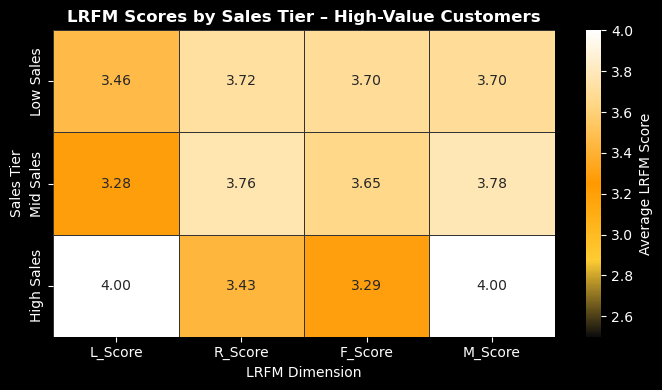

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

plt.figure(figsize=(7, 4))
plt.style.use('dark_background')

# 🎨 Gradasi warna lebih kontras: hitam → kuning → oranye → putih
cmap = mcolors.LinearSegmentedColormap.from_list(
    'aws_strong_orange',
    ['#0d0d0d', '#FFCC33', '#FF9900', '#FFD580', '#FFFFFF'], N=256
)

# Plot heatmap dengan gradasi kuat
ax = sns.heatmap(
    tier_behavior,
    annot=True, fmt=".2f",
    cmap=cmap,
    vmin=2.5, vmax=4.0,     # fokus pada range nilai LRFM (biar kontras lebih terasa)
    linewidths=0.5, linecolor='#333333',
    cbar_kws={'label': 'Average LRFM Score'}
)

# Styling teks & tampilan
ax.set_title('LRFM Scores by Sales Tier – High-Value Customers',
             color='white', fontsize=12, fontweight='bold')
ax.set_xlabel('LRFM Dimension', color='white')
ax.set_ylabel('Sales Tier', color='white')

# Colorbar & ticks
ax.figure.axes[-1].yaxis.label.set_color('white')
ax.figure.axes[-1].tick_params(colors='white')
plt.xticks(color='white')
plt.yticks(color='white')

# Border putih
for spine in ax.spines.values():
    spine.set_color('white')

plt.tight_layout()
plt.show()


| Sales_Tier     |  L_Score |  R_Score |  F_Score |  M_Score | Makna singkat                                                                                                                                          |
| -------------- | -------: | -------: | -------: | -------: | ------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **High Sales** | **4.00** | **3.43** | **3.29** | **4.00** | Pelanggan **paling lama** & **paling profit**, **kurang recent** & **kurang sering** transaksi. Tapi **nilai transaksi besar.** Pola enterprise: kontrak besar, renewal/commit jarang. |
| **Mid Sales**  |     3.28 | **3.76** |    **3.65**|     3.78 | **Paling recent/aktif kini**, frekuensi tinggi, profit mendekati tinggi. Ini “workhorse” yang sedang engaged.                                         |
| **Low Sales**  |     3.46 |     **3.72** |     **3.70**|     3.70 | **Pelanggan aktif dan recent**, tapi profit dan skala lebih kecil. Banyak yang “sering kecil-kecil” → growth potential.                                                       |


Insight:

- High Sales ≠ paling aktif sekarang. Mereka tenured (L=4) dan high margin (M=4), tapi R & F lebih rendah dibandingkan yang lain→ **big-ticket, low-touch (kontrak besar, pembaruan lebih jarang/periodik)**.
- Mid Sales justru paling recent (R= 3.76) dan cukup sering (F=3.65) → **segmen paling “hangat” untuk upsell**.
- Low Sales cukup aktif (R & F ~3.7) **tapi nilai per pelanggan lebih kecil**.

Itu sebabnya interpretasi “beda” dari ekspektasi: banyak orang mengira *“High Sales pasti paling aktif”*, padahal pada B2B SaaS sering kebalikannya (transaksi besar tapi tidak sering).

Cek distribusi per-tier

In [73]:
hv = df_lrfm[df_lrfm['Customer_value'] == 'High-Value'].copy()

# Hitung jumlah per tier
tier_counts = hv['Sales_Tier'].value_counts()

# Tampilkan hasil + total
print(tier_counts)
print("\nTotal High-Value Customer:", tier_counts.sum())


Sales_Tier
Low Sales     1844
Mid Sales       82
High Sales       7
Name: count, dtype: int64

Total High-Value Customer: 1933


| Sales Tier     | Jumlah Pelanggan | Proporsi    | Catatan Utama                                                                      |
| -------------- | ---------------- | ----------- | ---------------------------------------------------------------------------------- |
| **Low Sales**  | **1.844**        | ≈ **95.5%** | Dominan — mayoritas pelanggan “High-Value” justru punya volume *sales* kecil.      |
| **Mid Sales**  | **82**           | ≈ **4.2%**  | Minoritas menengah; berpotensi naik kelas jika engagement dijaga.                  |
| **High Sales** | **7**            | ≈ **0.3%**  | Sangat sedikit pelanggan besar — tetapi menyumbang porsi profit besar. |


- Distribusi sangat timpang (skewed):

Data menunjukkan imbalance ekstrem antar-tier. Ini berarti analisis rata-rata atau perbandingan antar-tier (misal mean L_Score, R_Score, dll) bisa bias terhadap n kecil, terutama di High Sales.

- Interpretasi bisnis di konteks AWS SaaS:
1. Mayoritas pelanggan High-Value AWS berasal dari segmentasi volume kecil-menengah, artinya:
    - Mereka aktif dan loyal, tapi kontribusi moneternya tidak besar per transaksi.
    - Bisa jadi mereka pelanggan lama, loyal, dengan usage stabil tapi bukan heavy spender.

2. Pelanggan High Sales (7 entitas) kemungkinan:
    - Enterprise-level dengan kontrak tahunan besar (AWS Enterprise Support, Reserved Instance, atau Multi-Account Consolidation).
    - Walau jumlahnya kecil, mereka mungkin mendominasi total revenue AWS.

**Kesimpulan** (High-Value):

- High Sales: Merupakan **VVIP Customer** pelanggan berumur panjang (L=4) dan margin tinggi (M=4), namun aktivitas terkini & frekuensi lebih rendah (R=3.2; F=3.2) — mencerminkan kontrak besar tapi jarang. Meskipun entitasnya sedikit, mereka memiliki dominasi dalam konteks transaksi di AWS. Pendekatan bisnisnya bisa menggunakan metode *relationship-based treatement* seperti **Strategic Account Management**.
- Mid Sales: paling “hangat” saat ini (R=4.0) dengan frekuensi cukup tinggi (F=3.67), kandidat utama program **upsell/expand**.
- Low Sales: Pelanggan aktif dan loyal (R≈3.7; F≈3.7) meskipun nilai transaksi per pelanggan lebih kecil, tapi usage stabil. Cocok untuk **growth/enablement program**.

Rekomendasi strategi:  AWS sebaiknya dibedakan per tier:
- High → Retensi, Renewal, dan Relationship-based management (Strategic Account Management)
- Mid → Upsell
- Low → Growth/Enablement Program.

## **KESIMPULAN DAN REKOMENDASI**

**Profit tinggi ≠ High-Value Customer.** : Sekitar setengah dari pelanggan berprofit tertinggi justru tergolong Mid-Value, menunjukkan *mereka belum memiliki perilaku pembelian atau aktivitas yang stabil*.

Dari hasil analisis explorasi data, teridentifikasi ada dua pilar utama pelanggan AWS:

1. **Potential Mid-Value Customer/hidden gem** (berprofit tinggi namun belum konsisten. Tapi potensial untuk naik kategori) 
2. **High-Value Customer** (Stabil tapi terbatas jumlahnya)

# Potential Mid-Value Customer (*hidden gem*)

**Pelanggan Mid-Value berprofit tinggi = peluang besar**. Mereka menghasilkan uang, tapi belum menunjukkan pola loyalitas yang kuat → harus dijaga agar tidak churn.

Dari pola ini, *hidden gem* **Mid-Value Customer* berikut strategi utamanya :
1. **Retention Program (untuk yang mendorong aktifitas recency dan frequency yang belum optimal)**:
    - Usage Credit
    - Engagement & Loyaly Bonus
    - PAM (Personalized Account Management)
2. **Customer Reactivation Program** (meningkatkan frekuensi)


# High-Value Customer
**High-Value Customer** adalah kelompok pelanggan yang memberikan kontribusi terhadap **profitabilitas dan pertumbuhan jangka panjang perusahaan**. Dalam analisis *LRFM (Length-Recency-Frequency-Monetary*), pelanggan dikategorikan sebagai **High-Value Customer** apabila memenuhi empat karakteristik:

1. Masih aktif bertransaksi baru-baru ini (Recency rendah),
2. Memiliki durasi hubungan panjang (Length tinggi),
3. Transaksi sering (Frequency tinggi),
4. Dan profit tinggi (Monetary besar).

**High-Value Customer** merupakan pelanggan yang **engagement aktif, loyalitas tinggi, sering bertransaksi, dan kontribusi profit besar secara stabil**.
Mereka menjadi segmen prioritas utama karena berdampak langsung pada **pendapatan dan stabilitas** bisnis perusahaan SaaS seperti AWS.


Berdasarkan analisa industri, High-Value Customer hanya ditemukan berkontribusi di 5 kategori industri, yaitu **Consumer Products, Retail, Finance, Healthcare, dan Energy**.

Dalam analisa **komparasi lima industri tersebut**, disimpulkan bahwa High-Value Customer di AWS bersifat **tidak homogen**. Disetiap industri memiliki pola profitabilitas, aktifitas, dan loyalitas yang cukup berbeda. Berikut ringkasan sekaligus langkah strategis yang dapat dilakukan AWS apabila dilihat dari pertimbangan sudut pandang industri di antara **High-Value Customer**:

| Industri              | Ciri Utama                      | Fokus Strategi AWS                       |
| --------------------- | ------------------------------- | ---------------------------------------- |
| **Consumer Products** | Profit besar, frekuensi rendah  | **Segmented Retention** (dalam bentuk Retensi premium & kontrak *enterprise*)             |
| **Retail**            | Loyalitas tinggi, profit stabil | **Enterprise Loyalty Program** (dalam bentuk Loyalty & AI upselling)                   |
| **Finance**           | Frekuensi tinggi, margin kecil  | **Margin Growth Strategy** (Margin optimization & compliance service) |
| **Healthcare**        | Aktivitas stabil, loyal         | **Healthcare Specialization** (Data governance & HIPAA compliance)       |
| **Energy**            | Profit kecil, baru aktif        | **Optimalize Reactivation Program** (Cross-sell IoT & predictive analytics)    |



Berikut kesimpulan dari hasil analisa **komparasi antar wilayah** (Antar Region dan Antar Negara):

1. **Analisa antar Region**

Dari hasil komparasi statistik, **tidak ada perbedaan ekstrem** antar region, tapi AWS dapat **memaksimalkan optimalisasi potensi lokal**. Hal ini karena masing- masing region memiliki keunggulan.
- **EMEA (Europe, Middle East, Africa)** memimpin dalam profit 
- **AMER (Amerika Utara & Selatan)** unggul dalam loyalitas 
- **APJ (Asia-Pacific & Japan)** unggul dalam frekuensi aktivitas.

2. **Analisa antar Negara**

Secara global, pelanggan High-Value AWS menunjukkan engagement tinggi dan loyalitas kuat di seluruh negara (Length ≈ 1 400 hari, Recency < 5).
Namun, pola perbedaan muncul di karakter profit dan aktivitas transaksi:

| **Wilayah / Kawasan**          | **Karakteristik Pelanggan**                               | **Strategi yang Disarankan**                                                                                                                                  |
| :----------------------------- | :-------------------------------------------------------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Eropa Timur / Timur Tengah** | Margin tinggi, tetapi frekuensi transaksi rendah.         | Kembangkan **Premium Enterprise Support** dengan **pendekatan personal (Personal Account Management)** dan SLA tinggi untuk menjaga retensi pelanggan bernilai besar namun jarang bertransaksi. |
| **APAC (Asia-Pacific)**        | Margin relatif rendah, tetapi frekuensi transaksi tinggi. | Dorong **Growth Expansion Programs**, fokus pada **upselling** dan **insentif volume-based** untuk meningkatkan nilai transaksi per pelanggan.                |
| **Eropa Barat / Amerika**      | Pasar stabil dengan tingkat retensi pelanggan tinggi.     | Pertahankan pelanggan **loyal** melalui **Modernization Credits**, **long-term contracts**, dan program peningkatan infrastruktur berbasis cloud.             |



Yang terakhir adalah kesimpulan berdasarkan analisa volume Penjualan. Pada proses analisa, customer penjualan dibagi menjadi tiga kelas dengan proses binning manual sebagai berikut yaitu:
1. Low Sales : 0-1000
2. Mid Sales : 1000-5000
3. High Sales :>5000

Dan dari kondisi tersebut ditemukan bahwa :
1. Proporsi High-Value Customer didominasi di sales tier **Low Sales** dengan proporsi **95%**, menandakan mayoritas pelanggan mempunyai volume penjualan kecil. Meskipun begitu transaksi tier ini adalah yang paling aktif dan cenderung loyal.
2. Proporsi High-Value Customer ditier menengah atau **Mid Sales** minoritas menengah dengan proporsi **4.2%**. Pelanggan di level ini merupakan pelanggan paling tinggi retensinya dan punya nilai frekuensi kedua terbesar selisih tipis dengan **low sales** (hanya selisih 0.05).
3. Proporsi High-Value Customer dengan sales besar atau **High Sales** hanya berjumlah **7 transaksi dari 1933** dengan proporsi **0.3%**, namun menyumbang **porsi profit terbesar** (*M_Score 4*)

Disimpulkan bahwa :
1. **Low Sales** : Mereka **aktif** dan **loyal**, tapi **bukan heavy spender**
2. **Mid Sales** : **Aktif** dan **loyal**
3. **High Sales** : **Jumlah transaksi sangat kecil** tapi **nilai transaksinya sangat besar** dan memungkinkan tier ini adalah *Most sales-driver AWS*.

Rekomendasi treatment untuk masing-masing tier kelas jika mempertimbangkan aspek volume penjualan:
1. **Low Sales**: Sangat cocok untuk **Growth/Enablement Program**
2. **Mid Sales** : Kandidat ideal untuk **Upsell** dan **Growth Expansion Program (level enterprise)**
3. **High Sales** : VVIP Customer yang perlu pendekatan bisnis dengan metode *relationship-based treatment* seperti **Strategic Account Management (Personal Account Management dilevel stratejik)**